## Datos para reporte anual de vivienda

El presente notebook se calcularán los datos necesarios para el reporte anual de vivienda. Los datos se obtendrán de la API del Sistema Nacional de Información e Indicadores de Vivienda (SNIIV) de la Secretaría de Desarrollo Agrario, Territorial y Urbano (SEDATU) así como del INEGI.

## Instalar paquetes 


In [8]:
!pip install geopandas
!pip install funciones
!pip install dataframe_image

In [9]:
import pandas as pd
import dataframe_image as dfi
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import locale
import geopandas as gpd
import funciones
import time
from pandas.api.types import CategoricalDtype
from matplotlib import ticker
from PIL import Image, ImageDraw
import calendar
import matplotlib.colors as mcolors
import seaborn as sns


In [38]:
#Evitar notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

##  1) Etorno Macroeconómico



#### Indicador Global de la Actividad Económica (IGAE)
- Gráfica 1. Variación anual del Indicador Global de la Actividad Económica (IGAE)

In [39]:
# URL con token del la variación anual del igae
url_igae = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/737221/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_igaec = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/737256/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_indica = requests.get(url_igae)
response_indicac = requests.get(url_igaec)

# Convertir la respuesta en JSON
data_igae = response_indica.json()
data_igaec = response_indicac.json()

In [40]:
# Usar las columnas TIME_PERIOD y OBS_VALUE
df_igae = pd.DataFrame(data_igae["Series"][0]["OBSERVATIONS"])
df_igaec = pd.DataFrame(data_igaec["Series"][0]["OBSERVATIONS"])

In [46]:
#Ver el tipo de variables de los df
df_igae.info()
df_igaec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 3 to 37
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   35 non-null     datetime64[ns]
 1   Total   35 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 840.0 bytes
<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 3 to 37
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TIME_PERIOD   35 non-null     datetime64[ns]
 1   Construccion  35 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 840.0 bytes


In [51]:
#Convertir los tipos de datos de caracteres a fecha y numericas
df_igae['TIME_PERIOD'] = pd.to_datetime(df_igae['TIME_PERIOD'])
df_igae['OBS_VALUE'] = pd.to_numeric(df_igae['OBS_VALUE'])

df_igaec['TIME_PERIOD'] = pd.to_datetime(df_igaec['TIME_PERIOD'])
df_igaec['OBS_VALUE'] = pd.to_numeric(df_igaec['OBS_VALUE'])

# Obtener datos de las fechas requeridas 2023-01 a 2023-12
df_igae = df_igae.loc[(df_igae['TIME_PERIOD'] >= '2021-01') & (df_igae['TIME_PERIOD'] < '2023-12')]
df_igaec = df_igaec.loc[(df_igaec['TIME_PERIOD'] >= '2021-01') & (df_igaec['TIME_PERIOD'] < '2023-12')]

# Filtrar las columnas 'TIME_PERIOD' y 'OBS_VALUE' solamente
df_igae = df_igae[['TIME_PERIOD', 'OBS_VALUE']]
df_igaec = df_igaec[['TIME_PERIOD', 'OBS_VALUE']]      C:\Users\hp\AppData\Local\Temp\ipykernel_10812\752146689.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_igae['TIME_PERIOD'] = pd.to_datetime(df_igae['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_10812\752146689.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_igaec['TIME_PERIOD'] = pd.to_datetime(df_igaec['TIME_PERIOD'])


SyntaxError: invalid syntax (3737001749.py, line 14)

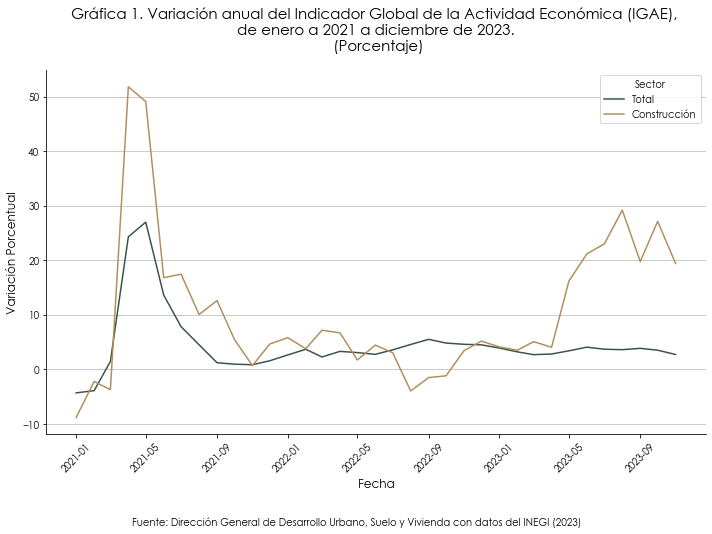

In [630]:
# Fuente de los textos
fuente = "Century Gothic"

# Definición de la figura
fig, ax = plt.subplots(figsize=(10, 7))

# Graficar la variable 'Total'
plt.plot(igae['Fecha'], igae['Total'], color='#3a544b', label='Total')

# Graficar la variable 'Construccion'
plt.plot(igae['Fecha'], igae['Construccion'], color='#b38e5d', label='Construcción')

# Añadir título y etiquetas de ejes
plt.title('Gráfica 1. Variación anual del Indicador Global de la Actividad Económica (IGAE), \n de enero a 2021 a diciembre de 2023. \n (Porcentaje)', fontsize=15, loc='center', pad=20, fontname=fuente)
plt.xlabel('Fecha', fontsize=12, fontname=fuente)
plt.ylabel('Variación Porcentual', fontsize=12, fontname=fuente)

# Líneas horizontales en el gráfico
#ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Eliminar marco del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir leyenda
plt.legend(title='Sector', fontsize=10)

# Añadir fuente
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2023)', ha='center', fontsize=10, fontname=fuente)

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, fontname=fuente)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


#### Inversión Fija Bruta (IFB)
- Gráfica 2. Variación anual de la Inversión Fija Bruta (IFB) de la construcción



In [54]:
# URL con token del ifb variación anual desestacionalizada
url_ifb =       "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/741160/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_ifb_resi =  "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/741167/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_ifb_nresi = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/741174/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_ifb = requests.get(url_ifb)
response_ifb_resi = requests.get(url_ifb_resi)
response_ifb_nresi = requests.get(url_ifb_nresi)

# Convertir la respuesta en JSON
data_ifb = response_ifb.json()
data_ifb_resi = response_ifb_resi.json()
data_ifb_nresi = response_ifb_nresi.json()

In [55]:
# Crear dataframes de pandas a partir de los datos JSON
df_ifb = pd.DataFrame(data_ifb["Series"][0]["OBSERVATIONS"])
df_ifb_resi = pd.DataFrame(data_ifb_resi["Series"][0]["OBSERVATIONS"])
df_ifb_nresi = pd.DataFrame(data_ifb_nresi["Series"][0]["OBSERVATIONS"])

In [56]:
#Usar las columnas necesarias
df_ifb = df_ifb[['TIME_PERIOD', 'OBS_VALUE']]
df_ifb_resi = df_ifb_resi[['TIME_PERIOD', 'OBS_VALUE']]
df_ifb_nresi = df_ifb_nresi[['TIME_PERIOD', 'OBS_VALUE']]

In [58]:
#Convertir los tipos de datos
df_ifb['TIME_PERIOD'] = pd.to_datetime(df_ifb['TIME_PERIOD'])
df_ifb['OBS_VALUE'] = pd.to_numeric(df_ifb['OBS_VALUE'])

df_ifb_resi['TIME_PERIOD'] = pd.to_datetime(df_ifb_resi['TIME_PERIOD'])
df_ifb_resi['OBS_VALUE'] = pd.to_numeric(df_ifb_resi['OBS_VALUE'])

df_ifb_nresi['TIME_PERIOD'] = pd.to_datetime(df_ifb_nresi['TIME_PERIOD'])
df_ifb_nresi['OBS_VALUE'] = pd.to_numeric(df_ifb_nresi['OBS_VALUE'])

C:\Users\hp\AppData\Local\Temp\ipykernel_10812\172831823.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ifb['TIME_PERIOD'] = pd.to_datetime(df_ifb['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_10812\172831823.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ifb_resi['TIME_PERIOD'] = pd.to_datetime(df_ifb_resi['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_10812\172831823.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ifb_nresi['TIME_PERIOD'] = pd.to_datetime(df_ifb_nresi['TIME_PERIOD'])


In [59]:
#Obtener datos de las fechas requeridas 2023-12-01 a 2023-01-01
df_ifb = df_ifb.loc[(df_ifb['TIME_PERIOD'] >= '2021-01') & (df_ifb ['TIME_PERIOD'] <= '2023-12')]
df_ifb_resi  = df_ifb_resi .loc[(df_ifb_resi['TIME_PERIOD'] >= '2021-01') & (df_ifb_resi ['TIME_PERIOD'] <= '2023-12')]
df_ifb_nresi  = df_ifb_nresi .loc[(df_ifb_nresi['TIME_PERIOD'] >= '2021-01') & (df_ifb_nresi ['TIME_PERIOD'] <= '2023-12')]

In [60]:
# Renombrar las columnas en los DataFrames
df_ifb.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Construcción'}, inplace=True)
df_ifb_resi.rename(columns={'OBS_VALUE': 'Residencial'}, inplace=True)
df_ifb_nresi.rename(columns={'OBS_VALUE': 'No residencial'}, inplace=True)

# Copiar el dataframe df_ifb en el nuevo dataframe ifb
ifb = df_ifb[['Fecha', 'Construcción']].copy()

# Agregar las variables necesarias al nuevo dataframe
ifb['Residencial'] = df_ifb_resi['Residencial'].values
ifb['No residencial'] = df_ifb_nresi['No residencial'].values

ifb

,Fecha,Construcción,Residencial,No residencial
2,2023-12-01,22.13,0.66,40.07
3,2023-11-01,21.58,6.02,35.64
4,2023-10-01,31.22,19.32,42.92
5,2023-09-01,26.20,8.02,41.68
6,2023-08-01,39.40,0.51,77.72
7,2023-07-01,30.03,3.69,54.92
8,2023-06-01,31.53,1.00,57.63
9,2023-05-01,23.10,1.64,47.89
10,2023-04-01,7.72,-9.71,29.70
11,2023-03-01,7.04,-1.46,16.49


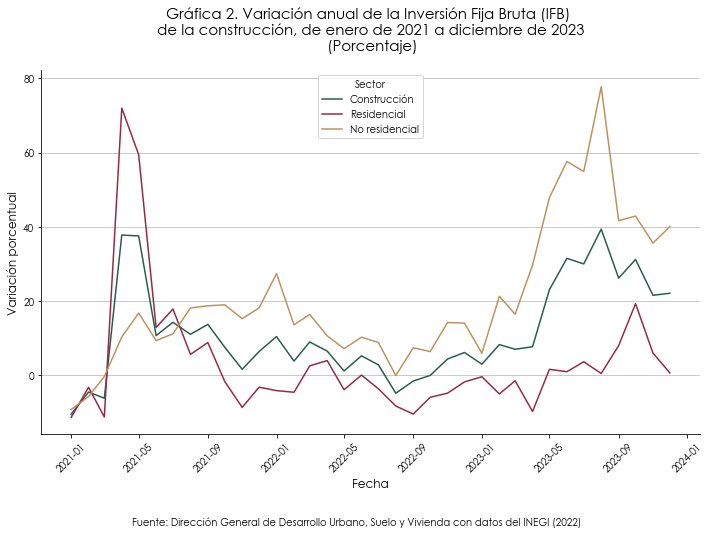

In [61]:
# Fuente de los textos
plt.rcParams['font.family'] = 'Century Gothic'

# Definición de la figura
fig, ax = plt.subplots(figsize=(10, 7))

# Datos del DataFrame ifb
fechas = ifb['Fecha']
construccion = ifb['Construcción']
residencial = ifb['Residencial']
no_residencial = ifb['No residencial']

# Crear la gráfica
plt.plot(fechas, construccion, label='Construcción', color='#285c4d')
plt.plot(fechas, residencial, label='Residencial', color='#962945')
plt.plot(fechas, no_residencial, label='No residencial', color='#bb9361')

# Eliminar marco del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Líneas horizontales en el gráfico
ax.yaxis.grid(True, color='#bdbdbd')

# Título y etiquetas de los ejes
plt.title('Gráfica 2. Variación anual de la Inversión Fija Bruta (IFB) \n de la construcción, de enero de 2021 a diciembre de 2023 \n (Porcentaje)',  fontsize=15, loc='center', pad=20, fontname=fuente)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Variación porcentual', fontsize=12)

# Agregar la fuente al pie de la gráfica
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10)

# Mostrar la leyenda
plt.legend(title='Sector', fontsize=10)

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


#### Valor de la producción en la construcción
- Gráfica 3. Variación anual real del Valor de la producción de la industria de la construcción, de enero a 2023 a diciembre 2023 (porcentaje)

In [62]:
# URL con token del ifb variación anual desestacionalizada
url_co =  "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/736950/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_ed =  "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/736943/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_co = requests.get(url_co)
response_ed = requests.get(url_ed)

# Convertir la respuesta en JSON
data_co = response_co.json()
data_ed = response_ed.json()

In [63]:
# Crear dataframes de pandas a partir de los datos JSON
df_co = pd.DataFrame(data_co["Series"][0]["OBSERVATIONS"])
df_ed = pd.DataFrame(data_ed["Series"][0]["OBSERVATIONS"])

In [64]:
#Usar las columnas necesarias
df_co = df_co[['TIME_PERIOD', 'OBS_VALUE']]
df_ed = df_ed[['TIME_PERIOD', 'OBS_VALUE']]

In [65]:
df_co.info()
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TIME_PERIOD  363 non-null    object
 1   OBS_VALUE    363 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TIME_PERIOD  363 non-null    object
 1   OBS_VALUE    363 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [66]:
#Convertir los tipos de datos
df_co['TIME_PERIOD'] = pd.to_datetime(df_co['TIME_PERIOD'])
df_co['OBS_VALUE'] = pd.to_numeric(df_co['OBS_VALUE'])

df_ed['TIME_PERIOD'] = pd.to_datetime(df_ed['TIME_PERIOD'])
df_ed['OBS_VALUE'] = pd.to_numeric(df_ed['OBS_VALUE'])

C:\Users\hp\AppData\Local\Temp\ipykernel_10812\3838330760.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_co['TIME_PERIOD'] = pd.to_datetime(df_co['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_10812\3838330760.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ed['TIME_PERIOD'] = pd.to_datetime(df_ed['TIME_PERIOD'])


In [67]:
#Obtener datos de las fechas requeridas 
df_co = df_co.loc[(df_co['TIME_PERIOD'] >= '2022-01') & (df_co ['TIME_PERIOD'] <= '2023-12')]
df_ed = df_ed.loc[(df_ed['TIME_PERIOD'] >= '2022-01') & (df_ed ['TIME_PERIOD'] <= '2023-12')]

In [68]:
# Renombrar las columnas en los DataFrames
df_co.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Construcción'}, inplace=True)
df_ed.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Edificación'}, inplace=True)

In [69]:
# Añadir la columna de Edificación al DataFrame df_co
df_co['Edificación'] = df_ed['Edificación']
df_co

,Fecha,Construcción,Edificación
3,2023-12-01,7.04,15.61
4,2023-11-01,8.46,19.04
5,2023-10-01,16.96,26.93
6,2023-09-01,11.02,19.67
7,2023-08-01,5.51,28.64
8,2023-07-01,6.58,22.73
9,2023-06-01,6.70,21.66
10,2023-05-01,5.07,16.18
11,2023-04-01,-4.60,4.19
12,2023-03-01,0.15,5.44


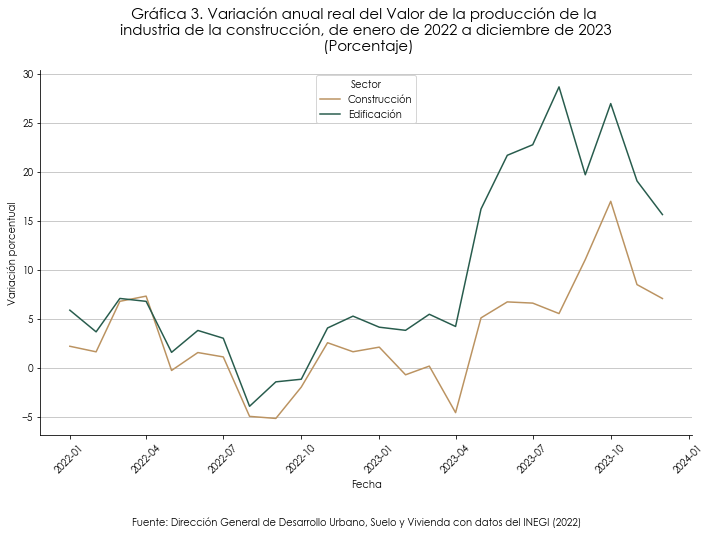

In [70]:
# Fuente de los textos
plt.rcParams['font.family'] = 'Century Gothic'

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 7))

# Graficar los datos
ax.plot(df_co['Fecha'], df_co['Construcción'], color='#bb9361', label='Construcción')
ax.plot(df_co['Fecha'], df_co['Edificación'], color='#285c4d', label='Edificación')

# Configurar título y etiquetas de los ejes
ax.set_title('Gráfica 3. Variación anual real del Valor de la producción de la \n industria de la construcción, de enero de 2022 a diciembre de 2023 \n (Porcentaje)', fontsize=15, loc='center', pad=20)
ax.set_xlabel('Fecha')
ax.set_ylabel('Variación porcentual')

# Agregar la fuente al pie de la gráfica
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10)

# Mostrar la leyenda centrada
plt.legend(title='Sector', fontsize=10, loc='upper center')

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Rotar las etiquetas del eje x para mayor legibilidad
ax.tick_params(axis='x', rotation=45)

# Ocultar marco en el lado derecho y arriba
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


- Gráfica 4. Variación anual de puestos de trabajo a enero 2023 a diciembre 2023 (porcentaje y variación absoluta)

- Gráfica 5. Horas trabajadas del personal ocupado del sector de la construcción 2023

## FINANCIAMIENTOS PARA VIVIENDA	

- Gráfica 6. Total de financiamientos para vivienda, por organismo otorgante enero a noviembre 2023, según organismo otorgante (porcentaje de acciones)

In [335]:
#Url
url="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023/0/0/organismo,modalidad,tipo_credito,destino_credito,anio,mes,sexo,grupo_edad"
r=requests.get(url)
print(r.status_code)

200


In [336]:
df=pd.DataFrame(r.json())
df

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
0,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,5,300939.02
1,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,26278.51
2,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,199788.64
3,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,2,512147.18
4,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,55018.64
...,...,...,...,...,...,...,...,...,...
62012,2023,febrero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,54,81000.00
62013,2023,febrero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,932,1899000.00
62014,2023,febrero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,155,341500.00
62015,2023,febrero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,153,292500.00


In [337]:
print("Destino de crédito: ",df["destino_credito"].unique())
print("Organismo: ",df["organismo"].unique())
print("Meses disponibles ",df["mes"].unique())

Destino de crédito:  ['Vivienda nueva' 'Con disponibilidad de terreno' 'Vivienda existente'
 'Mejoramientos' 'Ampliación' 'Pago de pasivos' 'Autoproducción'
 'Adquisición de suelo' 'En arrendamiento' 'Reconstrucción'
 'Regularización de asentamientos' 'Insumos para vivienda' 'Liquidez']
Organismo:  ['FOVISSSTE' 'INFONAVIT' 'CONAVI' 'SHF (FONDEO)' 'INSUS' 'HABITAT MEXICO'
 'BANJERCITO' 'BANCA (CNBV)' 'INVI']
Meses disponibles  ['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']


In [338]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
#shf=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos

#Filtrar solo para shf
shf=df[df["organismo"].isin(["SHF (FONDEO)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
shf=shf[(shf["año"] == 2023) & (shf["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
shf

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
35196,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,No distribuido,0,0.00
35197,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,No distribuido,0,1158580.13
35198,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,12,0.00
35199,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Rural,10,0.00
35200,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Mixto,1,0.00
...,...,...,...,...,...,...,...,...,...
40131,2023,diciembre,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,No distribuido,0,3664593.02
40132,2023,diciembre,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,3,0.00
40133,2023,diciembre,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,12,0.00
40134,2023,diciembre,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,10,0.00


In [341]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
#infonavit=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para infonavit
infonavit=df[df["organismo"].isin(["INFONAVIT"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
infonavit=infonavit[(infonavit["año"] == 2023) & (infonavit["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
infonavit

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
8590,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,75,47734249.12
8591,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Mixto,12,6679074.79
8592,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Mixto,6,5494662.90
8593,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,3,0.00
8594,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,44,35484928.64
...,...,...,...,...,...,...,...,...,...
33930,2023,diciembre,INFONAVIT,Otros programas,Credito individual,Adquisición de suelo,Urbano,1,1044080.18
33931,2023,diciembre,INFONAVIT,Otros programas,Credito individual,Adquisición de suelo,Urbano,1,481926.25
33932,2023,diciembre,INFONAVIT,Otros programas,Credito individual,Adquisición de suelo,Urbano,1,538924.13
33933,2023,diciembre,INFONAVIT,Otros programas,Credito individual,Adquisición de suelo,Semiurbano,1,464538.02


In [342]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
#habitat_mexico=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para habitat_mexico
habitat_mexico=df[df["organismo"].isin(["HABITAT MEXICO"])]
    
# Filtrar el período de enero de 2023 a diciembre de 2023
habitat_mexico=habitat_mexico[(habitat_mexico["año"] == 2023) & (habitat_mexico["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
habitat_mexico

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
40558,2023,agosto,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Semiurbano,20,4467442.60
40559,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Rural,1,47000.00
40560,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,47000.00
40561,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Rural,14,658000.00
40562,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Semiurbano,93,3804000.00
...,...,...,...,...,...,...,...,...,...
40636,2023,noviembre,HABITAT MEXICO,Mejoramientos,Credito individual,Mejoramientos,Urbano,6,1017000.00
40637,2023,noviembre,HABITAT MEXICO,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,115000.00
40638,2023,diciembre,HABITAT MEXICO,Mejoramientos,Credito individual,Mejoramientos,Urbano,2,460000.00
40639,2023,diciembre,HABITAT MEXICO,Mejoramientos,Credito individual,Mejoramientos,Semiurbano,22,6294096.16


In [343]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
#fovissste=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para fovissste
fovissste=df[df["organismo"].isin(["FOVISSSTE"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
fovissste=fovissste[(fovissste["año"] == 2023) & (fovissste["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
fovissste

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
0,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,5,300939.02
1,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,26278.51
2,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,199788.64
3,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,2,512147.18
4,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,55018.64
...,...,...,...,...,...,...,...,...,...
8585,2023,noviembre,FOVISSSTE,Otros programas,Credito individual,Pago de pasivos,Urbano,1,547954.19
8586,2023,noviembre,FOVISSSTE,Otros programas,Credito individual,Pago de pasivos,Urbano,1,660642.18
8587,2023,diciembre,FOVISSSTE,Otros programas,Credito individual,Pago de pasivos,Urbano,1,656394.82
8588,2023,diciembre,FOVISSSTE,Otros programas,Credito individual,Pago de pasivos,Urbano,1,311032.31


In [344]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
#cnbv=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para cnbv
cnbv=df[df["organismo"].isin(["BANCA (CNBV)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
cnbv=cnbv[(cnbv["año"] == 2023) & (cnbv["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
cnbv

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
41137,2023,enero,BANCA (CNBV),Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,11,10462757.00
41138,2023,enero,BANCA (CNBV),Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Mixto,8,12323817.00
41139,2023,enero,BANCA (CNBV),Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,1919241.00
41140,2023,enero,BANCA (CNBV),Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,4,8615510.00
41141,2023,enero,BANCA (CNBV),Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,513261.00
...,...,...,...,...,...,...,...,...,...
61978,2023,diciembre,BANCA (CNBV),Otros programas,Credito individual,Adquisición de suelo,Urbano,1,833365.00
61979,2023,diciembre,BANCA (CNBV),Otros programas,Credito individual,Adquisición de suelo,Urbano,2,1960433.00
61980,2023,diciembre,BANCA (CNBV),Otros programas,Credito individual,Adquisición de suelo,Urbano,5,12171300.00
61981,2023,diciembre,BANCA (CNBV),Otros programas,Credito individual,Adquisición de suelo,Urbano,1,4273080.00


In [345]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
#banjercito=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para banjercito
banjercito=df[df["organismo"].isin(["BANJERCITO"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
banjercito=banjercito[(banjercito["año"] == 2023) & (banjercito["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
banjercito

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
40641,2023,abril,BANJERCITO,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,1511767.37
40642,2023,abril,BANJERCITO,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,1241000.00
40643,2023,abril,BANJERCITO,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,683538.03
40644,2023,abril,BANJERCITO,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,1400000.00
40645,2023,abril,BANJERCITO,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Semiurbano,1,515000.00
...,...,...,...,...,...,...,...,...,...
41132,2023,diciembre,BANJERCITO,Otros programas,Credito individual,Liquidez,Urbano,1,1210000.00
41133,2023,diciembre,BANJERCITO,Otros programas,Credito individual,Liquidez,Urbano,1,1048000.00
41134,2023,diciembre,BANJERCITO,Otros programas,Credito individual,Liquidez,Rural,1,4800000.00
41135,2023,diciembre,BANJERCITO,Otros programas,Credito individual,Liquidez,Urbano,1,954900.00


In [348]:
# Crear un df para pegar los resultados generales
autoprod=pd.concat([shf,infonavit,habitat_mexico,fovissste,cnbv,banjercito])
print("El total de financiamientos es "+str(autoprod["acciones"].sum())+" financiamientos equivalentes a "+str(autoprod["monto"].sum())+" pesos")
autoprod.groupby(["organismo"]).agg({"acciones":"sum","monto":"sum"}) 

El total de financiamientos es 681901 financiamientos equivalentes a 515164271201.5244 pesos


,acciones,monto
organismo,,
BANCA (CNBV),170606,276849450147.00
BANJERCITO,560,696030802.18
FOVISSSTE,36684,30567157562.18
HABITAT MEXICO,905,52354598.39
INFONAVIT,434029,202730797432.55
SHF (FONDEO),39117,4268480659.22


In [349]:
# Calcular el total general de monto
total_general_monto = autoprod["monto"].sum()
total_general_monto

515164271201.5244

In [350]:
# Calcular el total de acciones y montos por organismo
autoprod_total_por_organismo = autoprod.groupby(["organismo"]).agg({"acciones": "sum", "monto": "sum"})

# Calcular el total general de acciones y montos
total_general_acciones = autoprod["acciones"].sum()
total_general_monto = autoprod["monto"].sum()

# Calcular el porcentaje sobre el total general por organismo
autoprod_total_por_organismo["porcentaje_acciones"] = autoprod_total_por_organismo["acciones"] / total_general_acciones * 100

# Imprimir el DataFrame con el total y el porcentaje
print(autoprod_total_por_organismo)
print("\nTotal general de acciones:", total_general_acciones)
print("Total general de monto:", total_general_monto)

                acciones           monto  porcentaje_acciones
organismo                                                    
BANCA (CNBV)      170606 276849450147.00                25.02
BANJERCITO           560    696030802.18                 0.08
FOVISSSTE          36684  30567157562.18                 5.38
HABITAT MEXICO       905     52354598.39                 0.13
INFONAVIT         434029 202730797432.55                63.65
SHF (FONDEO)       39117   4268480659.22                 5.74

Total general de acciones: 681901
Total general de monto: 515164271201.5244


In [351]:
autoprod_total_por_organismo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, BANCA (CNBV) to SHF (FONDEO)
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   acciones             6 non-null      int64  
 1   monto                6 non-null      float64
 2   porcentaje_acciones  6 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 192.0+ bytes


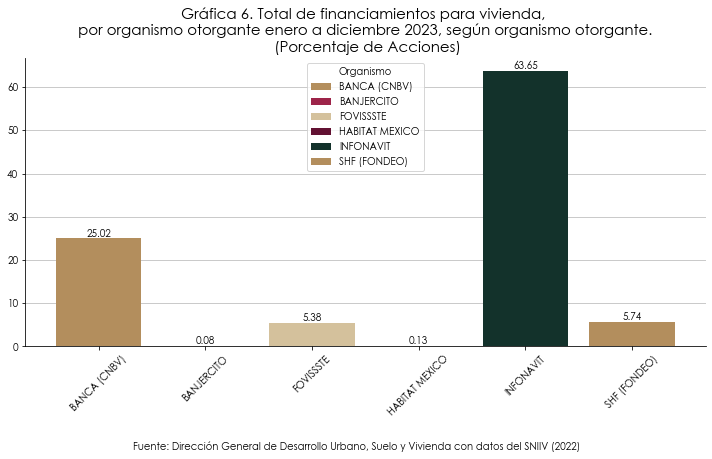

In [353]:
import matplotlib.pyplot as plt

# Definir colores personalizados
colores = ['#b38e5d', '#9d2449', '#d4c19c', '#621132', '#13322b']

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras y añadir a la leyenda
bars = ax.bar(autoprod_total_por_organismo.index, autoprod_total_por_organismo["porcentaje_acciones"], color=colores, label=autoprod_total_por_organismo.index)

# Añadir título
plt.title('Gráfica 6. Total de financiamientos para vivienda, \n por organismo otorgante enero a diciembre 2023, según organismo otorgante. \n (Porcentaje de Acciones)', fontsize=15, loc='center')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Ocultar marco en el lado derecho y arriba
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Añadir fuente
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2022)' , ha='center', fontsize=10)

# Etiquetas para las barras con dos decimales
for bar in bars:
    # Obtenemos la altura para las anotaciones.
    bar_value = bar.get_height()
    # Formato de números con dos decimales.
    text = f'{bar_value:.2f}'
    # Centrar etiquetas de x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
    # get_y() lugar donde empieza la barra y añadimos la altura.
    text_y = bar.get_y() + bar_value
    # Ubicación de las etiquetas de datos de las barras y color
    ax.text(text_x, text_y, text, ha='center', va='bottom', color="black", fontsize=10)

# Mostrar el gráfico
plt.tight_layout()

# Añadir leyenda
plt.legend(title='Organismo', fontsize=10, loc='upper center')
plt.show()


- Gráfica 7. Financiamientos de vivienda, por organismo otorgante y modalidad enero a diciembre a 2023 (porcentaje de acciones)

In [354]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
shf = df[df["organismo"].isin(["SHF (FONDEO)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
shf = shf[(shf["año"] == 2023) & (shf["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]

# Calcular el total de acciones
total_acciones = shf["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = shf.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 


destino_credito
Mejoramientos   100.00
Name: acciones, dtype: float64

In [355]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
infonavit = df[df["organismo"].isin(["INFONAVIT"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
infonavit = infonavit[(infonavit["año"] == 2023) & (infonavit["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]

# Calcular el total de acciones
total_acciones = infonavit["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = infonavit.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 


destino_credito
Adquisición de suelo             0.74
Autoproducción                   0.18
Con disponibilidad de terreno    2.21
Mejoramientos                   28.15
Pago de pasivos                  0.11
Vivienda existente              33.68
Vivienda nueva                  34.93
Name: acciones, dtype: float64

In [356]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
habitat_mexico = df[df["organismo"].isin(["HABITAT MEXICO"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
habitat_mexico = habitat_mexico[(habitat_mexico["año"] == 2023) & (habitat_mexico["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]

# Calcular el total de acciones
total_acciones = habitat_mexico["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = habitat_mexico.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 

destino_credito
Autoproducción          60.99
Insumos para vivienda    0.00
Mejoramientos           39.01
Name: acciones, dtype: float64

In [357]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
fovissste = df[df["organismo"].isin(["FOVISSSTE"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
fovissste = fovissste[(fovissste["año"] == 2023) & (fovissste["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]

# Calcular el total de acciones
total_acciones = fovissste["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = fovissste.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 

destino_credito
Ampliación                       0.02
Con disponibilidad de terreno    0.87
Mejoramientos                    0.02
Pago de pasivos                  0.10
Vivienda existente              52.73
Vivienda nueva                  46.24
Name: acciones, dtype: float64

In [358]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
cnbv = df[df["organismo"].isin(["BANCA (CNBV)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
cnbv = cnbv[(cnbv["año"] == 2023) & (cnbv["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]

# Calcular el total de acciones
total_acciones = cnbv["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = cnbv.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 

destino_credito
Adquisición de suelo             1.73
Autoproducción                   0.35
Con disponibilidad de terreno    1.82
Liquidez                         4.04
Mejoramientos                   26.71
Pago de pasivos                  3.76
Vivienda existente              17.92
Vivienda nueva                  43.66
Name: acciones, dtype: float64

In [359]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
banjercito = df[df["organismo"].isin(["BANJERCITO"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
banjercito = banjercito[(banjercito["año"] == 2023) & (banjercito["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]

# Calcular el total de acciones
total_acciones = banjercito["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = banjercito.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 

destino_credito
Con disponibilidad de terreno    2.68
Liquidez                         4.29
Vivienda existente              61.96
Vivienda nueva                  31.07
Name: acciones, dtype: float64

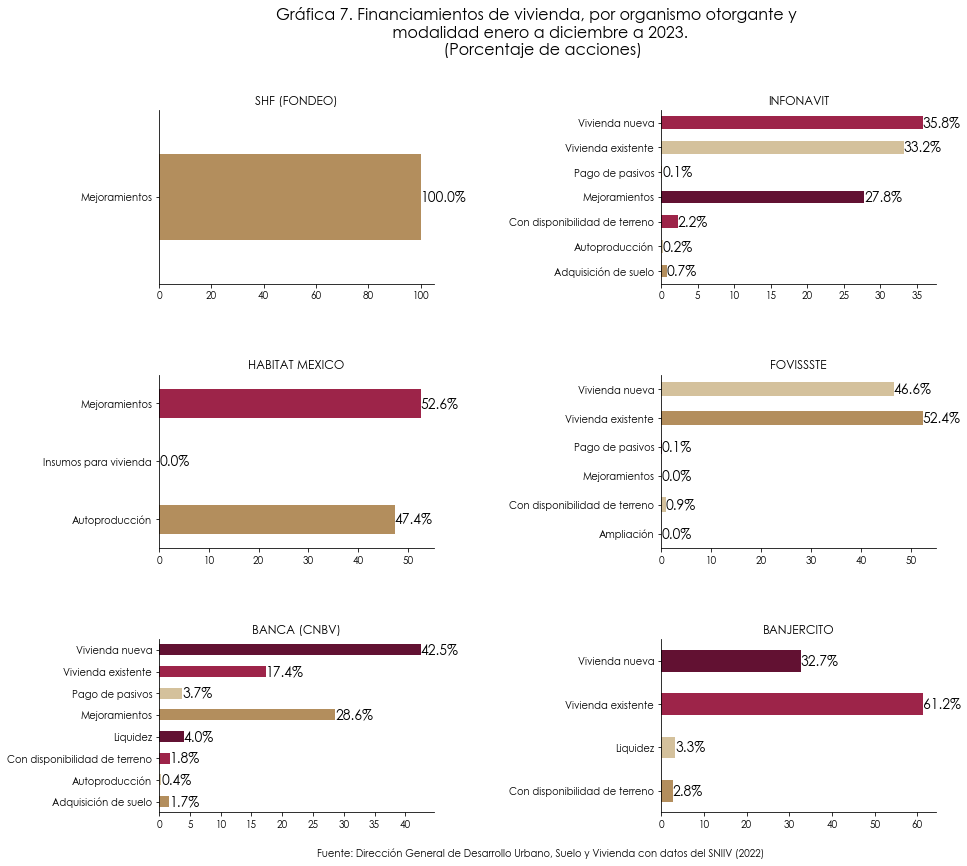

In [360]:
 # Colores personalizados
colores = ['#b38e5d', '#d4c19c', '#9d2449', '#621132']

# Crear DataFrames con los porcentajes para cada organismo y destino de crédito
organismos = ["SHF (FONDEO)", "INFONAVIT", "HABITAT MEXICO", "FOVISSSTE", "BANCA (CNBV)", "BANJERCITO"]
dataframes = {}

for organismo in organismos:
    df_organismo = df[df["organismo"] == organismo]
    df_organismo = df_organismo[(df_organismo["año"] == 2023) & (df_organismo["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]
    total_acciones = df_organismo["acciones"].sum()
    porcentaje_destino_credito = df_organismo.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
    dataframes[organismo] = porcentaje_destino_credito

# Crear gráficos de barras horizontales en una sola imagen
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Gráfica 7. Financiamientos de vivienda, por organismo otorgante y  \n modalidad enero a diciembre a 2023. \n (Porcentaje de acciones)', fontsize=16, y=0.987)
fig.tight_layout(pad=3.0, h_pad=7.0, w_pad=20.0)

# Crear gráficos para los organismos con sus colores correspondientes y ajustes en los contornos
for idx, (organismo, porcentajes) in enumerate(dataframes.items()):
    ax = axs[idx // 2][idx % 2]
    porcentajes.plot(kind="barh", ax=ax, color=colores)
    ax.set_title(organismo)
    ax.set_ylabel(None)
    
    # Ajustes en los contornos
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    
    # Etiquetas en las barras
    for bar in ax.patches:
        bar_value = bar.get_width()
        text = f'{bar_value:.1f}%'
        text_x = bar.get_width()
        text_y = bar.get_y() + bar.get_height() / 2
        ax.text(text_x, text_y, text, ha='left', va='center', color="black", fontsize=14)

# Ocultar leyenda
fig.legend().set_visible(False)

# Añadir fuente
plt.figtext(0.5, 0.003, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2022)', horizontalalignment='center', fontsize=10)
plt.show()

- Gráfica 8. Financiamientos promedio para vivienda, por organismo otorgante enero a diciembre a 2023, según organismo otorgante

In [361]:
# Obtener los datos del INPC desde la API del INEGI
url_inegi = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/628194/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf/?type=json"
response = requests.get(url_inegi)
inpc_data = response.json()

# Crear DataFrame con los datos
inpc = pd.DataFrame(inpc_data["Series"][0]["OBSERVATIONS"])

# Convertir tipos de datos a fecha y numéricos
inpc['TIME_PERIOD'] = pd.to_datetime(inpc['TIME_PERIOD'], format='%Y/%m')

# Obtener datos de las fechas requeridas (2023-01 a 2023-12)
inpc = inpc.loc[(inpc['TIME_PERIOD'] >= '2023-01') & (inpc['TIME_PERIOD'] <= '2023-12')]

# Filtrar las columnas 'TIME_PERIOD' y 'OBS_VALUE' solamente
inpc = inpc[['TIME_PERIOD', 'OBS_VALUE']]

# Renombrar las columnas en los DataFrames
inpc.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Inpc'}, inplace=True)

# Ordenar por fecha
inpc.sort_values(by='Fecha', inplace=True)

# Reiniciar el índice después de la clasificación
inpc.reset_index(drop=True, inplace=True)
inpc

,Fecha,Inpc
0,2023-01-01,127.336
1,2023-02-01,128.046
2,2023-03-01,128.389
3,2023-04-01,128.363
4,2023-05-01,128.084
5,2023-06-01,128.214
6,2023-07-01,128.832
7,2023-08-01,129.545
8,2023-09-01,130.12
9,2023-10-01,130.609


In [376]:
# Listas
lista = df['organismo'].unique()
print(lista) 
mes = df['mes'].unique()
print(mes)

['FOVISSSTE' 'INFONAVIT' 'CONAVI' 'SHF (FONDEO)' 'INSUS' 'HABITAT MEXICO'
 'BANJERCITO' 'BANCA (CNBV)' 'INVI']
['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']


In [377]:
# Definir el orden de los meses
meses_ordenados = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# Definir la función actualiza_precios
def actualiza_precios(df, inpc):
    # Agrupar por organismo, mes y año y calcular sumas
    df = df.groupby(['organismo', 'año', 'mes']).agg({'acciones':'sum', 'monto':'sum'}).reset_index()
    # Ordenar los meses
    df['mes'] = pd.Categorical(df['mes'], categories=meses_ordenados, ordered=True)
    df = df.sort_values(['organismo', 'año', 'mes'])
    # Pegar con tabla de INPC
    df = pd.merge(df, inpc, left_on='año', right_on='fecha', how='left')
    # Calcular precios actualizados
    df['monto_actualizado'] = round(df['monto'] * df['Inpc'] / 100, 2)
    # Calcular monto promedio actualizado
    df['monto_prom_actualizado'] = df['monto_actualizado'] / df['acciones']
    return df

# DataFrame del INPC 
inpc = pd.DataFrame({
    'fecha': [2023]*12,
    'Inpc': [127.336, 128.046, 128.389, 128.363, 128.084, 128.214, 128.832, 129.545, 130.12, 130.609, 131.445, 132.373]
})

# Lista de organismos únicos
lista_organismos = df['organismo'].unique()

# Paleta de colores
colores = ['#691c32', '#10312b', '#9f2241', '#bc955c', '#98989a', '#c47b91', '#235b4e', '#ddc9a3', '#6f7271']

# Aplicar la función actualiza_precios para todos los datos
df_actualizado = actualiza_precios(df, inpc)

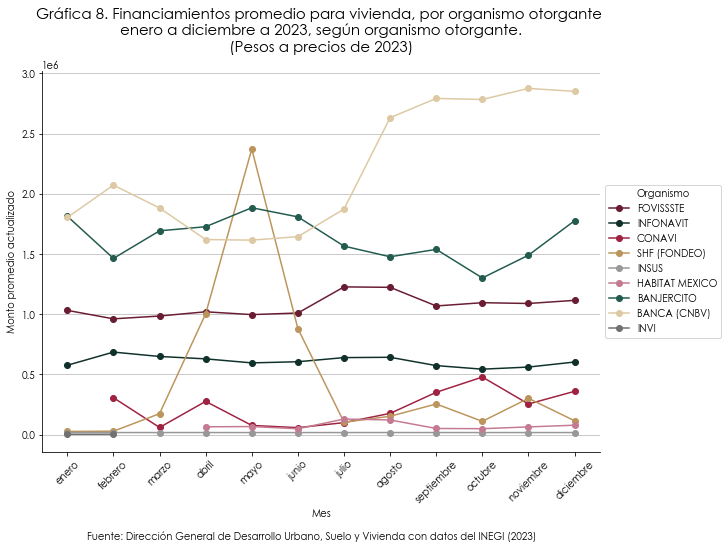

In [373]:
# Definición de la figura
fig, ax = plt.subplots(figsize=(10, 7))

# Iterar sobre cada organismo y graficar el monto promedio actualizado por mes
for i, organismo in enumerate(lista_organismos):
    df_organismo = df_actualizado[df_actualizado['organismo'] == organismo]
    monto_promedio_mensual = df_organismo.groupby('mes')['monto_prom_actualizado'].mean().reset_index()
    ax.plot(monto_promedio_mensual['mes'], monto_promedio_mensual['monto_prom_actualizado'], marker='o', linestyle='-', label=organismo, color=colores[i % len(colores)])

# Configurar título y etiquetas de los ejes
ax.set_title('Gráfica 8. Financiamientos promedio para vivienda, por organismo otorgante \n enero a diciembre a 2023, según organismo otorgante. \n (Pesos a precios de 2023) ', fontsize=15, loc='center', pad=20)
ax.set_xlabel('Mes')
ax.set_ylabel('Monto promedio actualizado')

# Agregar la fuente al pie de la gráfica
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2023)', ha='center', fontsize=10)

# Mostrar la leyenda afuera de la gráfica en el lado derecho
plt.legend(title='Organismo', fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Rotar las etiquetas del eje x para mayor legibilidad
ax.tick_params(axis='x', rotation=45)

# Ocultar marco en el lado derecho y arriba
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


- Gráfica 9. Total de financiamientos de vivienda, por organismo otorgante y sexo 2023 (cantidad de acciones)	

In [103]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
url1="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/0/0/organismo,genero,rango_edad,anio,mes"
r=requests.get(url1)
print(r.status_code)

200


In [104]:
#Crear dataframe 
df1=pd.DataFrame(r.json())

# Filtrar el DataFrame para excluir 'No disponible' en 'grupo_edad'
df_nd = df1[df1['grupo_edad'] != 'No disponible']
df_nd

,año,mes,organismo,sexo,grupo_edad,acciones,monto
1,2023,enero,FOVISSSTE,Hombre,29 o menos,87,67409665.15
2,2023,febrero,FOVISSSTE,Hombre,29 o menos,122,94277688.96
3,2023,marzo,FOVISSSTE,Hombre,29 o menos,146,106917046.01
4,2023,abril,FOVISSSTE,Hombre,29 o menos,152,116140306.58
5,2023,mayo,FOVISSSTE,Hombre,29 o menos,183,142524265.90
...,...,...,...,...,...,...,...
493,2023,febrero,INVI,Mujer,29 o menos,259,692500.00
494,2023,enero,INVI,Mujer,30 a 59,775,1740750.00
495,2023,febrero,INVI,Mujer,30 a 59,1535,3461000.00
496,2023,enero,INVI,Mujer,60 o más,180,348000.00


In [105]:
# Calcular el total de financiamientos por grupo de edad y sexo (excluyendo 'No disponible')
total_financiamientos = df_nd.groupby(['sexo','organismo'])['acciones'].sum()

# Reorganizar los datos para tener grupos de edad como barras y separados por sexo
total_financiamientos = total_financiamientos.unstack()
total_financiamientos = total_financiamientos.fillna(0)
total_financiamientos = total_financiamientos.astype(int)

total_financiamientos

organismo,BANCA (CNBV),BANJERCITO,CONAVI,FOVISSSTE,HABITAT MEXICO,INFONAVIT,INSUS,INVI,SHF (FONDEO)
sexo,,,,,,,,,
Hombre,103904,0,24404,15910,120,256832,2438,1763,15485
Mujer,66702,560,46136,20773,727,165363,2941,3235,23632


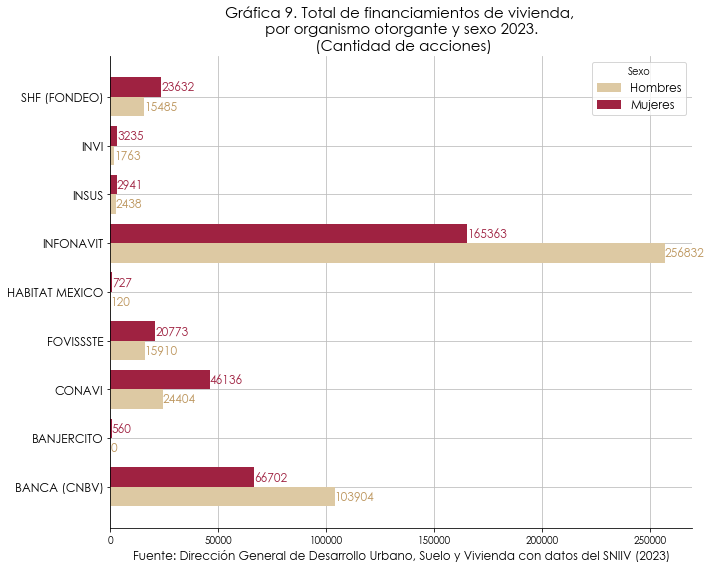

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'organismo': ['BANCA (CNBV)', 'BANJERCITO', 'CONAVI', 'FOVISSSTE', 'HABITAT MEXICO', 'INFONAVIT', 'INSUS', 'INVI', 'SHF (FONDEO)'],
    'Hombre': [103904, 0, 24404, 15910, 120, 256832, 2438, 1763, 15485],
    'Mujer': [66702, 560, 46136, 20773, 727, 165363, 2941, 3235, 23632]
}

df = pd.DataFrame(data)
df.set_index('organismo', inplace=True)

# Crear la gráfica de barras horizontal
fig, ax = plt.subplots(figsize=(10, 8))

# Definir el ancho de cada barra
bar_width = 0.40

# Crear un array de índices para las barras
indices = np.arange(len(df.index))

# Dibujar barras para Hombres
ax.barh(indices - bar_width/2, df['Hombre'], bar_width, color='#ddc9a3', label='Hombres')
for i, (value, name) in enumerate(zip(df['Hombre'], df.index)):
    ax.text(value, i - bar_width/2, f'{value}', ha='left', va='center', color='#bc955c', fontsize=12)

# Dibujar barras para Mujeres
ax.barh(indices + bar_width/2, df['Mujer'], bar_width, color='#9f2241', label='Mujeres')
for i, (value, name) in enumerate(zip(df['Mujer'], df.index)):
    ax.text(value, i + bar_width/2, f'{value}', ha='left', va='center', color='#9f2241', fontsize=12)

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Líneas verticales en el gráfico
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='#bdbdbd')


# Añadir etiquetas, título y leyenda
ax.set_yticks(indices)
ax.set_yticklabels(df.index, fontsize=12)
ax.set_xlabel('Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', fontsize=12)
ax.set_title('Gráfica 9. Total de financiamientos de vivienda, \n por organismo otorgante y sexo 2023. \n (Cantidad de acciones)', fontsize=15, loc='center')
ax.legend(title='Sexo', fontsize=12)

# Quitar el marco de arriba y de la derecha
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

- Gráfica 10. Financiamientos de vivienda según sexo y organismo otorgante 2023 (porcentaje de acciones)

In [107]:
# Calcular el total de financiamientos por sexo
total_financiamientos_por_sexo = df.sum(axis=1)

# Calcular los porcentajes por sexo y organismo
p_so = df.div(total_financiamientos_por_sexo, axis=0) * 100
p_so

,Hombre,Mujer
organismo,,
BANCA (CNBV),60.90,39.10
BANJERCITO,0.00,100.00
CONAVI,34.60,65.40
FOVISSSTE,43.37,56.63
HABITAT MEXICO,14.17,85.83
INFONAVIT,60.83,39.17
INSUS,45.32,54.68
INVI,35.27,64.73
SHF (FONDEO),39.59,60.41


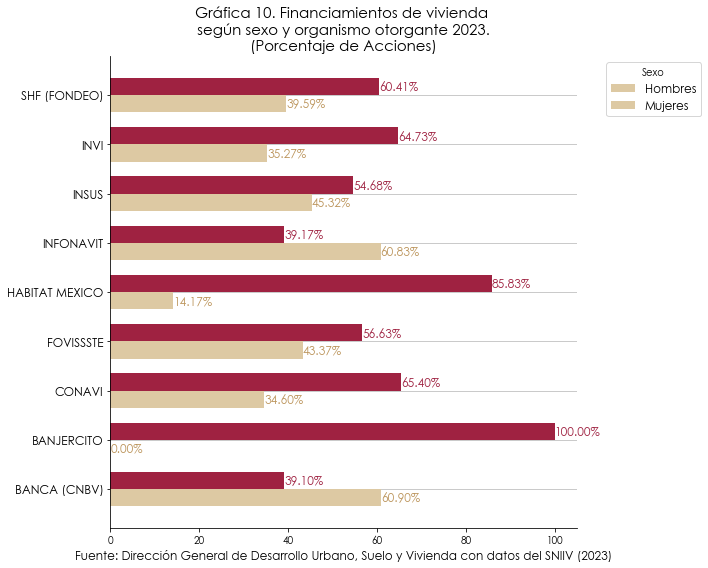

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame con los porcentajes por sexo y organismo
p_so = pd.DataFrame({
    'Hombre': [60.90, 0.00, 34.60, 43.37, 14.17, 60.83, 45.32, 35.27, 39.59],
    'Mujer': [39.10, 100.00, 65.40, 56.63, 85.83, 39.17, 54.68, 64.73, 60.41]
}, index=['BANCA (CNBV)', 'BANJERCITO', 'CONAVI', 'FOVISSSTE', 'HABITAT MEXICO', 'INFONAVIT', 'INSUS', 'INVI', 'SHF (FONDEO)'])

# Crear la gráfica de barras horizontal
fig, ax = plt.subplots(figsize=(10, 8))

# Definir el ancho de cada barra
bar_width = 0.35

# Crear una lista de índices para las barras
indices = list(range(len(p_so.index)))

# Dibujar barras para Hombres
for i, (value, name) in enumerate(zip(p_so['Hombre'], p_so.index)):
    ax.barh(i - bar_width/2, value, bar_width, color='#ddc9a3')
    ax.text(value, i - bar_width/2, f'{value:.2f}%', ha='left', va='center', color='#bc955c', fontsize=12)

# Dibujar barras para Mujeres
for i, (value, name) in enumerate(zip(p_so['Mujer'], p_so.index)):
    ax.barh(i + bar_width/2, value, bar_width, color='#9f2241')
    ax.text(value, i + bar_width/2, f'{value:.2f}%', ha='left', va='center', color='#9f2241', fontsize=12)

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Añadir etiquetas, título y leyenda
ax.set_yticks(indices)
ax.set_yticklabels(p_so.index, fontsize=12)
ax.set_xlabel('Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', fontsize=12)
ax.set_title('Gráfica 10. Financiamientos de vivienda \n según sexo y organismo otorgante 2023. \n(Porcentaje de Acciones)', fontsize=15, loc='center')
ax.legend(['Hombres', 'Mujeres'], title='Sexo', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Quitar el marco de arriba y de la derecha
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


- Gráfica 11. Total de acciones para vivienda por sexo y rango de ingresos, 2023  (Cantidad de Acciones)

In [109]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
url2="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/0/0/organismo,genero,rango_salarial,anio,mes"
r=requests.get(url2)
print(r.status_code)

200


In [110]:
df2=pd.DataFrame(r.json())
df2

,año,mes,organismo,sexo,rango_salarial,acciones,monto
0,2023,enero,FOVISSSTE,Hombre,2.6 o menos,45,20309748.77
1,2023,febrero,FOVISSSTE,Hombre,2.6 o menos,39,16878390.94
2,2023,marzo,FOVISSSTE,Hombre,2.6 o menos,75,34906382.61
3,2023,abril,FOVISSSTE,Hombre,2.6 o menos,72,34532753.32
4,2023,mayo,FOVISSSTE,Hombre,2.6 o menos,84,66104869.17
...,...,...,...,...,...,...,...
625,2023,diciembre,BANCA (CNBV),Mujer,Más de 12,1879,5197468895.00
626,2023,enero,INVI,Hombre,No disponible,589,1329750.00
627,2023,febrero,INVI,Hombre,No disponible,1174,2651000.00
628,2023,enero,INVI,Mujer,No disponible,1087,2438750.00


In [111]:
# Ver los rangos salariales: 
print("Rangos Salariales: ",df2["rango_salarial"].unique())   

Rangos Salariales:  ['2.6 o menos' '2.61 a 4.00' '4.01 a 6.00' '6.01 a 9.00' '9.01 a 12.00'
 'Más de 12' 'No disponible']


In [112]:
# Filtrar el DataFrame para excluir 'No disponible' en 'rango_salarial'
df_nd = df2[(df2['rango_salarial'] != 'No disponible') & (df2['sexo'] != 'No disponible')]

total_financiamientos = df_nd.groupby(['rango_salarial', 'sexo'])['acciones'].sum()
total_financiamientos

rango_salarial  sexo  
2.6 o menos     Hombre    64576
                Mujer     56558
2.61 a 4.00     Hombre    75813
                Mujer     71807
4.01 a 6.00     Hombre    75167
                Mujer     47882
6.01 a 9.00     Hombre    58501
                Mujer     30981
9.01 a 12.00    Hombre    30832
                Mujer     16501
Más de 12       Hombre    72927
                Mujer     33105
Name: acciones, dtype: int64

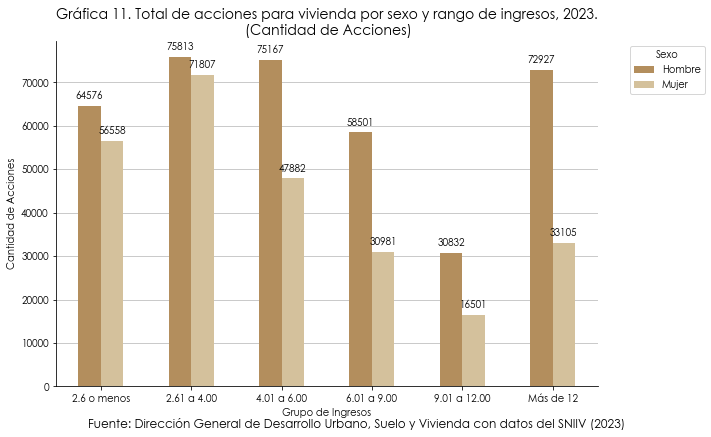

In [113]:
# Filtrar el DataFrame para excluir 'No disponible' en 'rango_salarial'
df_nd = df2[(df2['rango_salarial'] != 'No disponible') & (df2['sexo'] != 'No disponible')]

total_financiamientos = df_nd.groupby(['rango_salarial', 'sexo'])['acciones'].sum()

# Reorganizar los datos para tener 'rango_salarial' como barras y separados por 'sexo'
total_financiamientos = total_financiamientos.unstack()

# Definir colores personalizados para los sexos
colors = {'Hombre': '#b38e5d', 'Mujer': '#d4c19c'}

# Crear un gráfico de barras con colores personalizados
ax = total_financiamientos.plot(kind='bar', figsize=(10, 6), color=[colors[col] for col in total_financiamientos.columns])

# Añadir cantidad de acciones a cada barra
for p in ax.patches:
    ax.annotate(locale.format_string('%d', p.get_height(), grouping=True), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Añadir etiquetas y título
plt.title('Gráfica 11. Total de acciones para vivienda por sexo y rango de ingresos, 2023.\n (Cantidad de Acciones)',horizontalalignment='center', fontsize=14)
plt.xlabel('Grupo de Ingresos')
plt.ylabel('Cantidad de Acciones')
plt.xticks(rotation=0, ha='center')
plt.figtext(0.5, 0.001, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', horizontalalignment='center', fontsize=12)

# Añadir leyenda en el lado derecho, fuera del gráfico
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Quitar el marco de arriba y de la derecha
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

- Gráfica 12. Total de financiamientos de vivienda otorgado por rango de edad y sexo 2023 (Monto)

In [114]:
# Calcular el total de financiamientos por modalidad y sexo
total_montos = df_nd.groupby(['rango_salarial', 'sexo'])['monto'].sum()
total_montos

rango_salarial  sexo  
2.6 o menos     Hombre    15423875268.29
                Mujer     15037957841.99
2.61 a 4.00     Hombre    30421178882.90
                Mujer     30710548566.82
4.01 a 6.00     Hombre    38791185782.30
                Mujer     28439160231.83
6.01 a 9.00     Hombre    45093853876.22
                Mujer     28608054444.69
9.01 a 12.00    Hombre    33351897349.84
                Mujer     20554097305.61
Más de 12       Hombre   158028469177.33
                Mujer     68369049424.33
Name: monto, dtype: float64

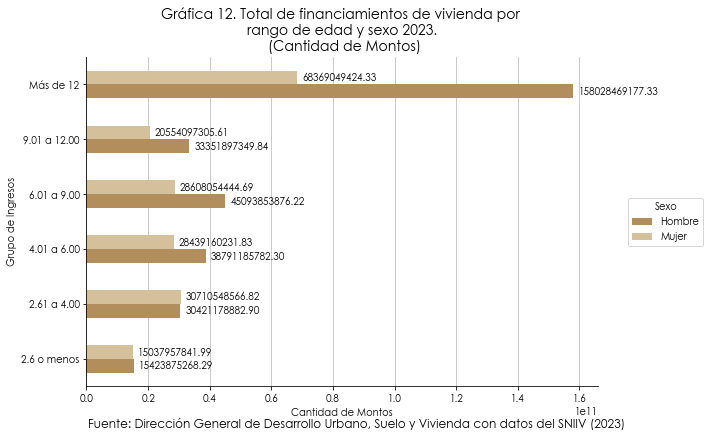

In [115]:
# Calcular el total de financiamientos por modalidad y sexo
total_montos = df_nd.groupby(['rango_salarial', 'sexo'])['monto'].sum()

# Reorganizar los datos para tener 'rango_salarial' como índice y 'sexo' como columnas
total_montos = total_montos.unstack()

# Crear un gráfico de barras horizontal con colores personalizados
ax = total_montos.plot(kind='barh', figsize=(10, 6), color=[colors[col] for col in total_montos.columns])

# Añadir cantidad de montos a cada barra
for p in ax.patches:
    ax.annotate(locale.format_string('%.2f', p.get_width(), grouping=True), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='#bdbdbd')

# Añadir etiquetas y título
plt.title('Gráfica 12. Total de financiamientos de vivienda por \nrango de edad y sexo 2023.\n (Cantidad de Montos)',horizontalalignment='center', fontsize=14)
plt.xlabel('Cantidad de Montos')
plt.ylabel('Grupo de Ingresos')
plt.yticks(rotation=0, ha='right')
plt.figtext(0.5, 0.001, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', horizontalalignment='center', fontsize=12)

# Quitar el marco de arriba y de la derecha
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar la leyenda en el medio del lado derecho
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Financiamientos para vivienda por entidad federativa	
- Tabla 1. Total de financiamientos de vivienda otorgadas por mes, 2023(Cantidad de monto)


In [116]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
urlf="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2022,2023/0/0/anio,mes"
r=requests.get(urlf)
print(r.status_code)
dff=pd.DataFrame(r.json())

200


In [117]:
# Crear un diccionario para mapear los nombres de los meses a su orden numérico
meses_ordenados = {
    "enero": 1, "febrero": 2, "marzo": 3, "abril": 4, "mayo": 5, "junio": 6,
    "julio": 7, "agosto": 8, "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12
}

# Agregar una nueva columna para el orden de los meses
dff['Nombre del mes'] = dff['mes'].map(meses_ordenados)

# Reorganizar el DataFrame usando pivot y ordenar los meses
dff_monto = dff.pivot(index='Nombre del mes', columns='año', values='monto')

# Restaurar el nombre del índice
dff_monto.index = dff_monto.index.map({v: k for k, v in meses_ordenados.items()})
dff_monto


año,2022,2023
Nombre del mes,,
enero,27075908565.49,28423539346.21
febrero,34241070574.95,35757175711.55
marzo,45078319844.03,45278197483.39
abril,37881641764.26,35755654098.23
mayo,43905778552.80,43687332883.51
junio,46076271566.93,49531566216.39
julio,42709870291.86,42690596602.90
agosto,45548883545.97,46937655297.03
septiembre,43167482981.51,44252364779.45


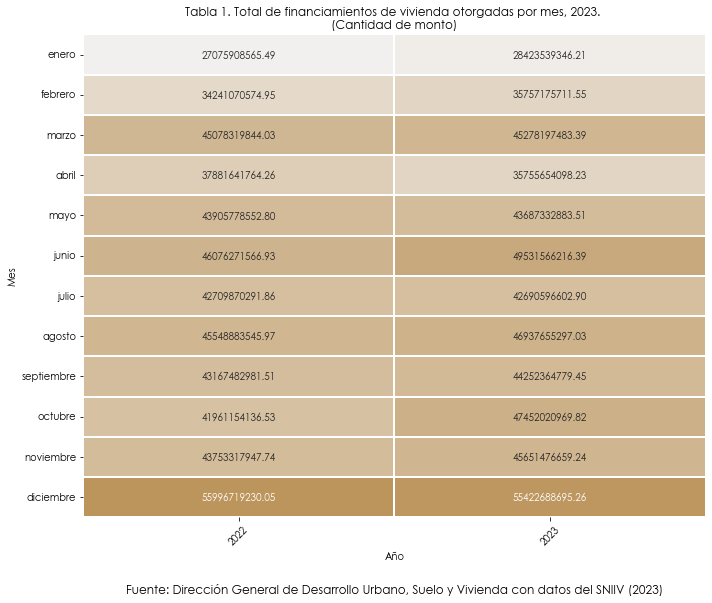

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el color base y tonos
color_base = '#bc955c'
tonos_color = sns.light_palette(color_base, as_cmap=True)

# Crear una tabla de calor con el mapa de colores personalizado
plt.figure(figsize=(10, 8))
ax = sns.heatmap(dff_monto, cmap=tonos_color, annot=True, fmt=".2f", linewidths=.10, cbar=False)
plt.title('Tabla 1. Total de financiamientos de vivienda otorgadas por mes, 2023. \n(Cantidad de monto)')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Agregar la fuente
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)

# Guardar la tabla de calor como imagen
plt.savefig('tabla_financiamiento_viv.png')

# Mostrar la tabla de calor
plt.show()



 - Tabla 2 Total de Financiamientos de vivienda otorgadas por mes, 2023 (Cantidad de acciones)

In [119]:
# Reorganizar el DataFrame usando pivot y ordenar los meses
dff_acciones = dff.pivot(index='Nombre del mes', columns='año', values='acciones')

# Restaurar el nombre del índice
dff_acciones.index = dff_acciones.index.map({v: k for k, v in meses_ordenados.items()})
dff_acciones


año,2022,2023
Nombre del mes,,
enero,54603,40226
febrero,57255,48345
marzo,64212,70339
abril,55534,48034
mayo,58897,65376
junio,65086,99801
julio,75946,58346
agosto,77795,58934
septiembre,98264,59579


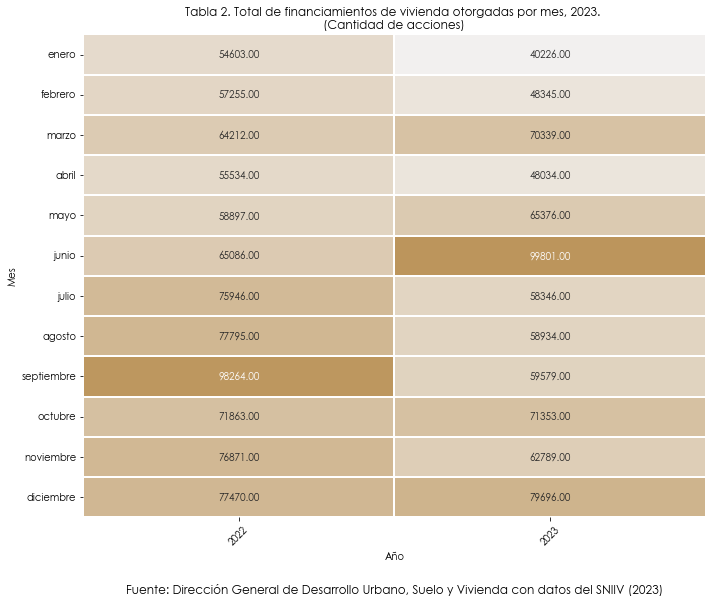

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el color base y tonos
color_base = '#bc955c'
tonos_color = sns.light_palette(color_base, as_cmap=True)

# Crear una tabla de calor con el mapa de colores personalizado
plt.figure(figsize=(10, 8))
ax = sns.heatmap(dff_acciones, cmap=tonos_color, annot=True, fmt=".2f", linewidths=.10, cbar=False)
plt.title('Tabla 2. Total de financiamientos de vivienda otorgadas por mes, 2023. \n(Cantidad de acciones)')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Agregar la fuente
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)

# Guardar la tabla de calor como imagen
plt.savefig('tabla_financiamiento_viv.png')

# Mostrar la tabla de calor
plt.show()

- Figura 1. Cantidad de acciones de financiamiento de vivienda anual 2023, por entidad federativa.

In [121]:
#Cartografía pára crar el mapa :) 
# Leer el archivo GeoJSON
estados = gpd.read_file("https://raw.githubusercontent.com/strotgen/mexico-leaflet/master/states.geojson")

# Renombrar Distrito Federal como Ciudad de México
estados['state_name'] = estados['state_name'].replace({'Distrito Federal': 'Ciudad de México'})

In [122]:
estados.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          0 non-null      object  
 1   state_code  32 non-null     int64   
 2   state_name  32 non-null     object  
 3   geometry    32 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 1.1+ KB


In [123]:
url3="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/00/0/estado,anio"
r=requests.get(url3)
print(r.status_code)
df3=pd.DataFrame(r.json())

# Filtrar el DataFrame para excluir 'No disponible' en 'rango_salarial'
df3 = df3[(df3['estado'] != 'No distribuido')]
df3

200


,año,estado,acciones,monto
1,2023,Aguascalientes,14336,9397462059.17
2,2023,Baja California,31482,21291554807.64
3,2023,Baja California Sur,6235,5080843332.80
4,2023,Campeche,7611,2234591638.87
5,2023,Coahuila de Zaragoza,28887,18773140567.65
6,2023,Colima,6239,4104562906.90
7,2023,Chiapas,35815,7358580417.94
8,2023,Chihuahua,34952,22109842276.91
9,2023,Ciudad de México,57140,55330531125.63
10,2023,Durango,14432,6015042782.31


In [124]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1 to 32
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   año       32 non-null     int64  
 1   estado    32 non-null     object 
 2   acciones  32 non-null     int64  
 3   monto     32 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [125]:
df3["acciones"].sum()

762818

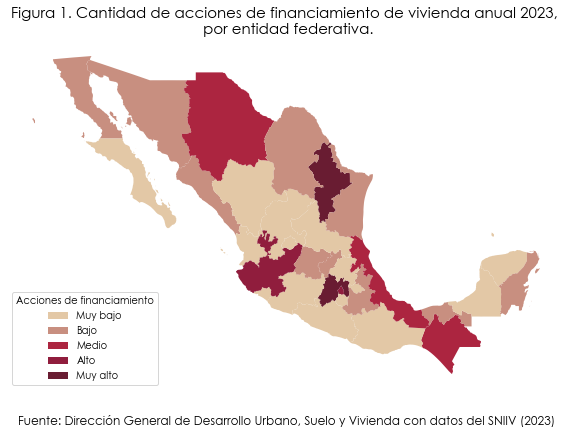

In [126]:
import geopandas as gpd
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Patch  
from matplotlib.colors import ListedColormap

# Fusionar GeoDataFrame de estados con DataFrame de acciones de financiamiento
edo = estados.merge(df3, left_on='state_name', right_on='estado', how='inner')

paleta = ["#e3c8a6ff", "#c88f80ff", "#ac2540ff", "#901d3dff", "#691c32ff"]

# Definir significado de cantidad del número de acciones por color
niveles = ["Muy bajo", "Bajo", "Medio", "Alto", "Muy alto"]

# Crear leyenda personalizada
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(paleta, niveles)]

# Convertir lista de colores a un objeto de paleta de colores
cmap_paleta = ListedColormap(paleta)

# Visualizar mapa de puntos con cantidad de acciones por estado
fig, ax = plt.subplots(figsize=(10, 10))
edo.plot(ax=ax, column='acciones', cmap=cmap_paleta, legend=False, linewidth=0.0, edgecolor='None')
plt.title('Figura 1. Cantidad de acciones de financiamiento de vivienda anual 2023, \n por entidad federativa.', fontdict={'fontsize': 15})
plt.text(0.5, -0.1, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', ha='center', transform=ax.transAxes, fontsize=12)
plt.axis('off')  # Quitar el marco del mapa
plt.legend(handles=legend_elements, title='Acciones de financiamiento', loc='lower left', fontsize=10)  # Ubica la leyenda en el lado izquierdo
plt.show()


- Tabla 3. Entidades federativas con mayor y menor cantidad de acciones de financiamiento de vivienda anual 2023. 

In [177]:
# Ordenar el DataFrame por la columna 'acciones'
df3_sorted = df3.sort_values(by='acciones', ascending=False)

In [178]:
# Obtener los 5 estados con la mayor cantidad de acciones
top_5_estados_mas_acciones = df3_sorted.head(5)
top_5_estados_mas_acciones

,año,estado,acciones,monto
15,2023,México,75995,43137499476.44
19,2023,Nuevo León,66868,57074506519.26
14,2023,Jalisco,61102,49560457363.79
9,2023,Ciudad de México,57140,55330531125.63
7,2023,Chiapas,35815,7358580417.94


In [179]:
# Obtener los 5 estados con la menor cantidad de acciones
top_5_estados_menos_acciones = df3_sorted.tail(5)
top_5_estados_menos_acciones

,año,estado,acciones,monto
6,2023,Colima,6239,4104562906.90
3,2023,Baja California Sur,6235,5080843332.80
18,2023,Nayarit,5447,5750729925.20
32,2023,Zacatecas,4427,2505536925.22
29,2023,Tlaxcala,4288,1960190800.68


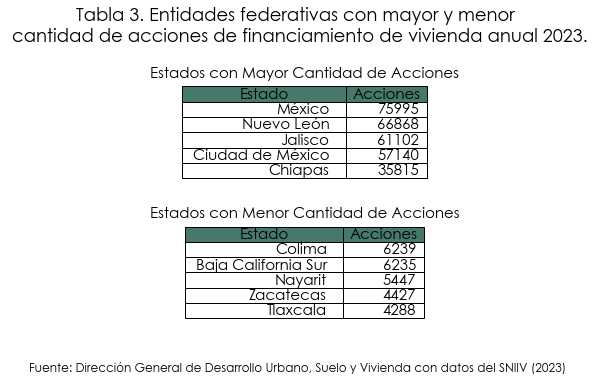

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Fuente de los textos
fuente = "Century Gothic"

# Crear la figura y los ejes con un tamaño más grande
fig, axs = plt.subplots(2, 1, figsize=(8, 3.5))  # Aumenta el tamaño de la figura

# Títulos de las tablas
titulo_general = "Tabla 3. Entidades federativas con mayor y menor \n cantidad de acciones de financiamiento de vivienda anual 2023."
titulo_tabla_mas_acciones = "Estados con Mayor Cantidad de Acciones"
titulo_tabla_menos_acciones = "Estados con Menor Cantidad de Acciones"

# Definir color de la tabla
colors = ['#235b4eff', '#D3EEE1']  # Gris claro a blanco
cm = LinearSegmentedColormap.from_list('custom', colors, N=6)

# Tabla para los 5 estados con la mayor cantidad de acciones
tabla_mas_acciones = axs[0].table(cellText=top_5_estados_mas_acciones[['estado', 'acciones']].values,
                                  colLabels=['Estado', 'Acciones'],
                                  loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_mas_acciones.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_mas_acciones.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_mas_acciones.auto_set_column_width(col=list(range(len(top_5_estados_mas_acciones.columns))))
tabla_mas_acciones.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[0].set_title(titulo_tabla_mas_acciones, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Tabla para los 5 estados con la menor cantidad de acciones
tabla_menos_acciones = axs[1].table(cellText=top_5_estados_menos_acciones[['estado', 'acciones']].values,
                                     colLabels=['Estado', 'Acciones'],
                                     loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_menos_acciones.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_menos_acciones.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_menos_acciones.auto_set_column_width(col=list(range(len(top_5_estados_menos_acciones.columns))))
tabla_menos_acciones.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[1].set_title(titulo_tabla_menos_acciones, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Ajustar el espacio entre los títulos de las tablas
plt.subplots_adjust(hspace=1.8)

# Agregar la fuente debajo de la segunda tabla
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)',
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12, fontname=fuente)

# Ocultar los ejes
for ax in axs:
    ax.axis('off')

# Agregar título general
plt.suptitle(titulo_general, fontsize=18, fontname=fuente, y=1.28)  # Ajusta la posición vertical del título general

# Guardar la imagen
plt.savefig('top_5_estados_acciones.png', bbox_inches='tight')

# Mostrar la imagen
plt.show()


- Figura 2. Variación porcentual de acciones de financiamiento de vivienda anual 2023.

In [131]:
url4="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2022,2023/00/0/estado,anio"
r=requests.get(url4)
print(r.status_code)
df4=pd.DataFrame(r.json())

# Filtrar el DataFrame para excluir 'No disponible' en 'rango_salarial'
df4 = df4[(df4['estado'] != 'No distribuido')]

200


In [132]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 2 to 65
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   año       64 non-null     int64  
 1   estado    64 non-null     object 
 2   acciones  64 non-null     int64  
 3   monto     64 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.5+ KB


In [139]:
# Crear una tabla pivote con los nombres de los estados como índice y las acciones para los años 2022 y 2023 como columnas
finac = df4.pivot_table(index='estado', columns='año', values='acciones', aggfunc='sum').reset_index()

# Renombrar las columnas para que coincidan con las especificaciones
finac.rename(columns={2022: 'acciones 2022', 2023: 'acciones 2023'}, inplace=True)

# Ordenar el DataFrame por el nombre del estado
finac.sort_values(by='estado', inplace=True)

# Reiniciar los índices
finac.reset_index(drop=True, inplace=True)

In [173]:
#Crear una columna con la variación porcentual 'Variación (%)
finac['variación (%)'] = ((finac['acciones 2023'] - finac['acciones 2022']) / finac['acciones 2022']) * 100

In [174]:
# Calculamos el valor más bajo y más alto de la variación porcentual
min = finac['variación (%)'].min()
max = finac['variación (%)'].max()

# Imprimimos los valores mínimo y máximo
print("Valor más bajo de la variación porcentual:", min)
print("Valor más alto de la variación porcentual:", max)

Valor más bajo de la variación porcentual: -52.05289788794442
Valor más alto de la variación porcentual: 16.02453335358791


In [175]:
# Fusionar GeoDataFrame de estados con DataFrame de acciones de financiamiento
edo_f = estados.merge(finac, left_on='state_name', right_on='estado', how='inner')

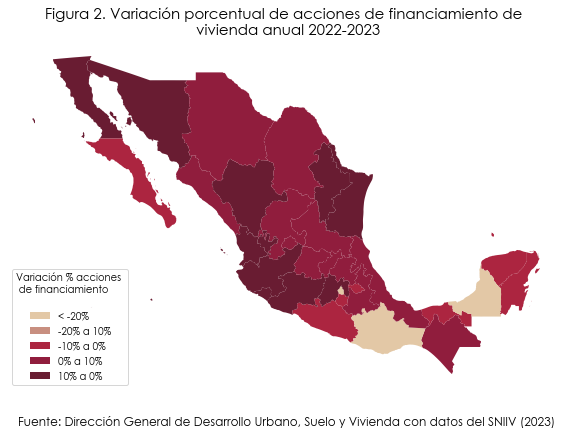

In [176]:
import geopandas as gpd
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Patch  
from matplotlib.colors import ListedColormap
import numpy as np

# Definir paleta de colores para la variación porcentual
paleta_variacion = ["#e3c8a6ff", "#c88f80ff", "#ac2540ff", "#901d3dff", "#691c32ff"]

# Definir límites de los rangos de variación porcentual
rangos = [-np.inf, -20, -10, 0, 10, 20, np.inf]

# Definir etiquetas de los rangos
etiquetas = ["< -20%", "-20% a 10%", "-10% a 0%", "0% a 10%", "10% a 0%", "> 20%"]

# Crear leyenda personalizada para la variación porcentual
leyenda_variacion = [Patch(facecolor=paleta_variacion[i], label=etiquetas[i]) for i in range(len(paleta_variacion))]

# Convertir lista de colores a un objeto de paleta de colores para la variación porcentual
cmap_variacion = ListedColormap(paleta_variacion)

# Visualizar mapa de variación porcentual de acciones de financiamiento
fig, ax = plt.subplots(figsize=(10, 10))
edo_f.plot(ax=ax, column='variación (%)', cmap=cmap_variacion, legend=False, linewidth=0.0, edgecolor='None')
plt.title('Figura 2. Variación porcentual de acciones de financiamiento de \n vivienda anual 2022-2023', fontdict={'fontsize': 15})
plt.text(0.5, -0.1, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', ha='center', transform=ax.transAxes, fontsize=12)
plt.axis('off')  # Quitar el marco del mapa
plt.legend(handles=leyenda_variacion, title='Variación % acciones \n de financiamiento \n', loc='lower left', fontsize=10)  # Ubicar la leyenda en el lado izquierdo
plt.show()

- Tabla 4. Entidades federativas con mayor y menor variación en acciones de financiamiento de vivienda anual 2023.

In [378]:
# Ordenar el DataFrame por la columna 'acciones'
finac = finac.sort_values(by='variación (%)', ascending=False)

In [379]:
# Obtener los 5 estados con la mayor cantidad variación porcentual de financiamientos
estados_may_var = finac.head(5)
estados_menor_var = finac.tail(5)

In [380]:
# Crear DataFrame para los 5 estados con la mayor y menor variación porcentual
top_5_mas_variacion = estados_may_var[['estado', 'variación (%)']]
top_5_menos_variacion = estados_menor_var[['estado', 'variación (%)']]

In [381]:
top_5_menos_variacion['variación (%)'] = top_5_menos_variacion['variación (%)'].round(2)
top_5_mas_variacion['variación (%)'] = top_5_mas_variacion['variación (%)'].round(2)

C:\Users\hp\AppData\Local\Temp\ipykernel_10812\749875139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_menos_variacion['variación (%)'] = top_5_menos_variacion['variación (%)'].round(2)
C:\Users\hp\AppData\Local\Temp\ipykernel_10812\749875139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_mas_variacion['variación (%)'] = top_5_mas_variacion['variación (%)'].round(2)


In [220]:
top_5_menos_variacion

año,estado,variación (%)
11,Guerrero,-23.89
30,Yucatán,-23.93
19,Oaxaca,-39.04
3,Campeche,-48.32
6,Ciudad de México,-52.05


In [221]:
top_5_mas_variacion 

año,estado,variación (%)
13,Jalisco,16.02
16,México,14.97
8,Colima,12.05
14,Michoacán de Ocampo,9.16
9,Durango,8.76


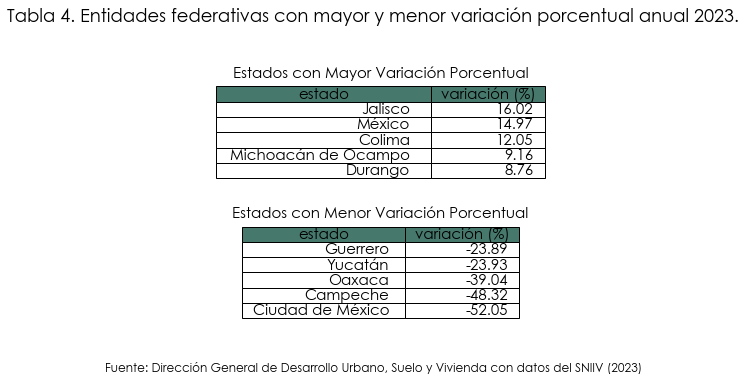

In [647]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Fuente de los textos
fuente = "Century Gothic"

# Crear la figura y los ejes con un tamaño más grande
fig, axs = plt.subplots(2, 1, figsize=(8, 3.5))  # Aumenta el tamaño de la figura

# Títulos de las tablas
titulo_general = "Tabla 4. Entidades federativas con mayor y menor variación porcentual anual 2023."
titulo_tabla_mas_variacion = "Estados con Mayor Variación Porcentual"
titulo_tabla_menos_variacion = "Estados con Menor Variación Porcentual"

# Definir color de la tabla
colors = ['#235b4eff', '#D3EEE1']  # Gris claro a blanco
cm = LinearSegmentedColormap.from_list('custom', colors, N=6)

# Tabla para los 5 estados con la mayor variación porcentual
tabla_mas_variacion = axs[0].table(cellText=top_5_mas_variacion.values,
                                   colLabels=top_5_mas_variacion.columns,
                                   loc='center', colColours=[cm(0.30), cm(0.30)])

tabla_mas_variacion.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_mas_variacion.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_mas_variacion.auto_set_column_width(col=list(range(len(top_5_mas_variacion.columns))))
tabla_mas_variacion.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[0].set_title(titulo_tabla_mas_variacion, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Tabla para los 5 estados con la menor variación porcentual
tabla_menos_variacion = axs[1].table(cellText=top_5_menos_variacion.values,
                                      colLabels=top_5_menos_variacion.columns,
                                      loc='center', colColours=[cm(0.30), cm(0.30)])

tabla_menos_variacion.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_menos_variacion.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_menos_variacion.auto_set_column_width(col=list(range(len(top_5_menos_variacion.columns))))
tabla_menos_variacion.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[1].set_title(titulo_tabla_menos_variacion, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Ajustar el espacio entre los títulos de las tablas
plt.subplots_adjust(hspace=1.8)

# Agregar la fuente debajo de la segunda tabla
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)',
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12, fontname=fuente)

# Ocultar los ejes
for ax in axs:
    ax.axis('off')

# Agregar título general
plt.suptitle(titulo_general, fontsize=18, fontname=fuente, y=1.28)  # Ajusta la posición vertical del título general

# Guardar la imagen
plt.savefig('top_5_estados_variacion.png', bbox_inches='tight')

# Mostrar la imagen
plt.show()


- Figura 3. Monto total de financiamientos de vivienda anual, 2023 por entidad federativa (miles de millones de pesos)

In [382]:
# Filtrar el DataFrame para excluir 'No distribuido en Estado
df4 = df4[(df4['estado'] != 'No distribuido')]

# Crear una tabla pivote con los nombres de los estados como índice y las acciones para los años 2022 y 2023 como columnas
finmon = df4.pivot_table(index='estado', columns='año', values='monto', aggfunc='sum').reset_index()

# Renombrar las columnas para que coincidan con las especificaciones
finmon.rename(columns={2022: 'montos 2022', 2023: 'montos 2023'}, inplace=True)

# Ordenar el DataFrame por el nombre del estado
finmon.sort_values(by='estado', inplace=True)

# Reiniciar los índices
finmon.reset_index(drop=True, inplace=True)

In [383]:
# Fusionar el DataFrame finmon con el GeoDataFrame del mapa de estados
finmon_geo = estados.merge(finmon, how='inner', left_on='state_name', right_on='estado')
finmon_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           0 non-null      object  
 1   state_code   32 non-null     int64   
 2   state_name   32 non-null     object  
 3   geometry     32 non-null     geometry
 4   estado       32 non-null     object  
 5   montos 2022  32 non-null     float64 
 6   montos 2023  32 non-null     float64 
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 1.9+ KB


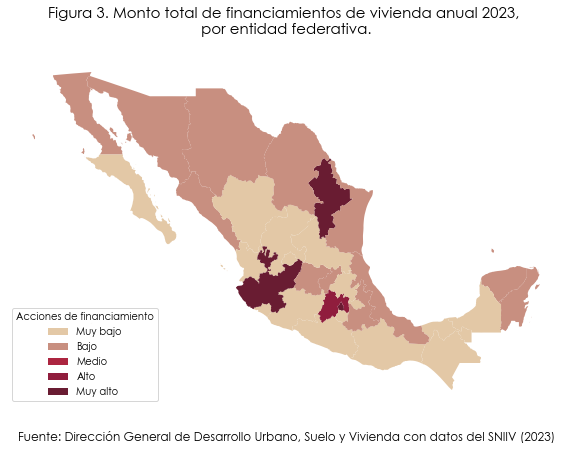

In [384]:
import geopandas as gpd
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Patch  
from matplotlib.colors import ListedColormap

# Fusionar el DataFrame finmon con el GeoDataFrame del mapa de estados
finmon_geo = estados.merge(finmon, how='inner', left_on='state_name', right_on='estado')
finmon_geo

# Definir paleta de colores para la cantidad de acciones
paleta = ["#e3c8a6ff", "#c88f80ff", "#ac2540ff", "#901d3dff", "#691c32ff"]

# Definir significado de cantidad del número de acciones por color
niveles = ["Muy bajo", "Bajo", "Medio", "Alto", "Muy alto"]

# Crear leyenda personalizada
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(paleta, niveles)]

# Convertir lista de colores a un objeto de paleta de colores
cmap_paleta = ListedColormap(paleta)

# Visualizar mapa de puntos con cantidad de acciones por estado
fig, ax = plt.subplots(figsize=(10, 10))
finmon_geo.plot(ax=ax, column='montos 2023', cmap=cmap_paleta, legend=False, linewidth=0.0, edgecolor='None')
plt.title('Figura 3. Monto total de financiamientos de vivienda anual 2023, \n por entidad federativa. \n', fontdict={'fontsize': 15})
plt.text(0.5, -0.1, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', ha='center', transform=ax.transAxes, fontsize=12)
plt.axis('off')  # Quitar el marco del mapa
plt.legend(handles=legend_elements, title='Acciones de financiamiento', loc='lower left', fontsize=10)  # Ubica la leyenda en el lado izquierdo
plt.show()

- Tabla 5. Entidades federativas con mayor y menor monto de financiamiento individual de vivienda anual 2023.


In [691]:
url_ind="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/00/0/estado,tipo_credito,mes"
r=requests.get(url_ind)
print(r.status_code)
df_ind=pd.DataFrame(r.json())

200


In [692]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   año           2700 non-null   int64  
 1   mes           2700 non-null   object 
 2   estado        2700 non-null   object 
 3   tipo_credito  2700 non-null   object 
 4   acciones      2700 non-null   int64  
 5   monto         2700 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 126.7+ KB


In [693]:
#Quitar los estados no distribuidos
df_ind = df_ind[(df_ind['estado'] != 'No distribuido')]


# Filtrar por crédito individual
credito_individual = df_ind.loc[df_ind['tipo_credito'] == 'Credito individual']

In [694]:
# Convertir el mes de tipo objeto a tipo datetime para ordenar correctamente
credindiv.index = pd.to_datetime(credindiv.index, format='%B', errors='coerce')
credindiv = credindiv.dropna()  # Eliminar las filas con fechas que no pudieron ser convertidas

In [697]:
# Obtener los montos totales mensuales por estado 
credindiv= credito_individual.groupby(['mes', 'estado',])['monto'].sum().reset_index()
credindiv = credindiv.pivot(index='mes', columns='estado', values='monto')

In [700]:
# Lista de meses en orden
meses_ordenados = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# Reordenar el DataFrame según la lista de meses
credindiv = credindiv.reindex(meses_ordenados)
credindiv

estado,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacán de Ocampo,Morelos,México,Nayarit,Nuevo León,Oaxaca,Puebla,Querétaro,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
enero,506912315.83,1131327701.62,274324708.73,122416943.26,305802688.10,1151076445.70,1945204433.15,765555218.12,186625290.24,233159378.09,1016391425.84,230106480.10,419115760.46,2921251934.16,386851406.91,404766688.60,1627400399.81,248212595.68,2617750789.60,133958964.17,670856205.52,1062921742.09,954936338.35,617683434.16,1045284865.86,736926644.89,193682240.79,630409033.96,109428147.73,793753240.34,824685229.82,128533932.52
febrero,508823799.80,1191095817.07,399344611.07,88247401.13,314813249.36,1279340415.17,3485498542.21,1078022924.79,273137636.13,362205423.72,1306942919.10,280064047.79,478661560.50,3140614240.96,486223484.25,438757159.34,2467702716.39,398888382.78,3575247819.88,131565007.00,823127416.66,1381774830.06,1187413095.63,692606360.41,1096018135.07,782106835.58,255164212.41,769857508.83,120275260.50,900236352.77,735419842.78,128482674.64
marzo,674872232.90,1457895035.43,421528525.29,144673608.66,432775521.89,1594865879.77,4198596884.98,1461261031.09,333954408.07,501916374.48,1735427443.64,436602148.08,745626255.67,3926738082.65,639320255.97,598330224.38,2720233141.13,433325682.38,4197613945.36,169255365.18,1051976721.25,1721711539.91,1575502887.27,878607676.68,1347005136.50,1069398025.04,338566622.96,1026291923.64,121791229.24,1186475934.13,1079494820.66,197140615.04
abril,576532704.14,1391870701.07,314489412.42,109123432.49,365492309.13,1229530801.32,3409836689.70,942323494.03,213683274.37,378095021.15,1159618882.99,338365965.32,637554380.77,2970472737.80,495644032.75,487252376.90,2229865284.80,373947117.66,3295300931.36,152982289.55,905879749.52,1251388634.26,1311921984.33,721910321.02,1068204909.76,896471538.50,287095714.24,890940810.13,108008378.02,962894903.34,886729882.06,146040444.76
mayo,685481512.66,1628988072.23,368278061.22,208672947.01,452967124.55,1618888226.22,4133777028.71,902935046.11,302137250.36,477412955.99,1534379036.13,433242901.69,837283383.49,3911411489.64,605832414.91,591312222.90,2921895716.39,414191695.89,4138829142.48,177041647.84,1031111566.32,1310035782.81,1375583527.86,756753248.94,1328791604.85,1127254083.78,337770530.23,994310503.17,145075895.73,1161886793.93,1085707535.30,186913910.86
junio,808086071.18,1507985321.90,553144798.36,216607408.83,524884279.42,1628326916.60,4868074761.32,1589748686.94,305496913.70,509774925.55,1757431903.76,408471590.64,904436409.20,3601432749.15,648606741.94,607012497.88,3221194717.38,465865278.35,4579582729.48,160597318.20,1160304853.40,1672438857.61,1662019679.91,923856924.07,1428242112.86,1362429515.56,386046527.65,1121421165.37,147605552.59,1323228294.02,1060679546.18,245222700.81
julio,650063577.31,1373489165.29,395621746.30,161202289.07,419241158.48,1468875606.40,3913925711.27,1275898067.25,249840877.20,453329749.83,1644508180.42,333496713.85,670704595.16,3627621405.78,615618289.53,525600192.01,2623092175.41,581756206.55,3956358169.02,165705637.11,1008764183.82,1429777162.14,1280830077.20,807966295.09,1292023433.09,1174922999.20,298735640.92,1067501170.09,139260611.04,1136213179.56,1002720812.01,147543998.49
agosto,744725178.32,1597273714.30,371806353.80,194749634.81,518426854.59,1670779095.79,4183059991.47,1362597140.86,349114982.82,492450656.92,1684933316.35,465601790.33,925783570.55,4025331079.95,702399720.06,540421251.05,3076820041.21,370003321.40,4196074334.51,156748173.50,1100500621.69,1403730038.27,1456972776.58,931757985.59,1323180453.94,1256362396.85,366934685.27,1230775884.04,145804660.70,1251765995.90,1085036013.90,188078043.25
septiembre,722233485.69,1427655763.03,430391375.09,136966608.97,475646753.60,1611675664.40,3853258113.19,

In [701]:
# DataFrame del INPC con los nombres de los meses 
inpc = pd.DataFrame({
    'mes': ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
    'Inpc': [127.336, 128.046, 128.389, 128.363, 128.084, 128.214, 128.832, 129.545, 130.12, 130.609, 131.445, 132.373]
})

In [702]:
# Unir los DataFrames por la columna de mes
credindiv = pd.merge(credindiv, inpc, left_on='mes', right_on='mes', how='left')

In [703]:
# Crear un nuevo DataFrame con los montos promedio actualizados por estado y mes
montos_actualizados = pd.DataFrame()  # Crear un DataFrame vacío para almacenar los montos actualizados

# Iterar sobre las columnas de estados en credindiv
for estado in credindiv.columns[1:-1]:
    # Calcular los montos actualizados para cada estado y mes
    montos_actualizados[estado] = round(credindiv[estado] * credindiv['Inpc'] / 100, 2)
montos_actualizados

,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacán de Ocampo,Morelos,México,Nayarit,Nuevo León,Oaxaca,Puebla,Querétaro,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
0,645481866.48,1440587442.14,349314111.11,155880838.86,389396910.93,1465734702.90,2476945517.00,974827392.54,237641179.58,296895825.68,1294232186.01,293008387.50,533685244.74,3719805362.88,492601107.51,515413710.59,2072266573.10,316063990.83,3333339145.44,170577986.61,854241457.86,1353482029.51,1215977735.80,786533377.72,1331023936.79,938372912.53,246627218.13,802737647.49,139341426.20,1010733626.12,1050121184.24,163669968.31
1,651528522.69,1525150549.93,511344800.69,112997267.25,403105773.27,1638144228.01,4463041463.36,1380365234.27,349741817.56,463789556.86,1673488130.19,358610810.63,612906981.76,4021430910.98,622589722.64,561810992.25,3159794620.24,510760618.62,4577961823.44,168463728.86,1053981731.94,1769307398.89,1520434972.43,886854740.25,1403407381.23,1001456518.68,326727567.43,985771745.75,154007660.06,1152716640.27,941675691.89,164516925.57
2,866461711.10,1871776857.04,541196258.34,185744999.42,555636164.79,2047632354.38,5390536554.66,1876098425.21,428760724.97,644405414.03,2228097940.61,560549131.90,957302093.39,5041499756.94,820816883.43,768190191.78,3492480127.56,556342510.35,5389274568.31,217305270.81,1350622392.65,2210488228.97,2022772401.94,1128035610.01,1729406424.71,1372989430.37,434682301.56,1317645937.84,156366541.31,1523304587.07,1385952605.29,253106864.24
3,740054675.02,1786646988.01,403688044.46,140074111.65,469156892.77,1578262622.50,4376968670.00,1209594706.64,274290261.48,485334112.00,1488521586.77,434336704.06,818383929.79,3812987920.42,636223549.76,625451768.56,2862321975.53,480009738.64,4229947134.52,196372656.33,1162814422.88,1606319992.59,1684022416.75,926665745.37,1371179868.31,1150737760.96,368524671.67,1143638352.11,138642794.28,1236000784.77,1138233078.51,187461896.11
4,877992140.68,2086473082.44,471705271.94,267276657.45,580178411.81,2073536795.67,5294706969.46,1156515324.46,386989475.75,611489610.54,1965294044.63,554914838.20,1072426048.91,5009892292.38,775974390.32,757376347.58,3742480909.37,530513291.76,5301177918.85,226762024.22,1320688938.60,1677946232.06,1761902405.82,969279831.37,1701969439.16,1443832120.67,432630005.94,1273552664.88,185819010.28,1488191081.13,1390617639.52,239406813.58
5,1036079475.30,1933448300.62,709209071.77,277721023.15,672975130.01,2087743072.85,6241553374.47,2038280381.48,391689812.93,653602823.05,2253273741.08,523717765.23,1159614097.69,4617540985.00,831604648.10,778275004.03,4130022594.95,597304507.99,5871666200.78,205908245.56,1487673264.74,2144300756.90,2130941912.40,1184513916.62,1831206342.58,1746825379.07,494965694.97,1437818932.96,189250983.19,1696563924.89,1359939673.34,314409833.62
6,837489907.92,1769493561.43,509687408.19,207680133.05,540116769.29,1892381821.24,5042388772.34,1643764998.00,321874998.91,584033783.30,2118652779.00,429650486.39,864082144.03,4673537209.50,793113354.77,677141239.37,3379382111.43,749488156.02,5097055356.32,213481886.40,1299611073.29,1842010513.53,1650119005.06,1040919137.29,1664539629.32,1513676798.33,384867100.91,1375283107.45,179412230.42,1463806163.49,1291825276.53,190083884.13
7,964754232.25,2069188233.19,481656541.03,252288414.41,671596068.78,2164410779.65,5418945065.96,1765176466.13,452261004.49,637945203.51,2182746864.67,603163839.29,1199306326.46,5214615147.52,909923717.35,700088709.67,3985866522.38,479320802.71,5435804496.64,203059421.37,1425643530.37,1818462078.08,1887435383.42,1207045882.43,1714114119.06,1627554667.00,475345538.04,1594408618.98,188882647.70,1621600259.39,1405609904.20,243645701.13
8,939770211.59,1857665678.85,560025257.27,178220951.59,618911555.78,2097112374.52,5013859456.89,1863690602.71,428129279.37,602030572.56,2260713301.91,58026544

In [704]:
print(montos_actualizados.columns)

Index(['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche',
       'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila de Zaragoza',
       'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco',
       'Michoacán de Ocampo', 'Morelos', 'México', 'Nayarit', 'Nuevo León',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype='object')


In [705]:
# Crear DataFrames con nombres de columna personalizados
# Obtener los 5 estados con el monto promedio actualizado más alto
estados_monto_promedio_alto = promedio_por_estado.nlargest(5).reset_index()

# Crear DataFrame con nombres de columna personalizados y montos redondeados
top_5_estados_monto_alto_df = pd.DataFrame(estados_monto_promedio_alto)
top_5_estados_monto_alto_df.columns = ['Estado', 'Monto Promedio Actualizado']
top_5_estados_monto_alto_df['Monto Promedio Actualizado'] = top_5_estados_monto_alto_df['Monto Promedio Actualizado'].round(2)
top_5_estados_monto_alto_df


,Estado,Monto Promedio Actualizado
0,Nuevo León,1290026789.28
1,Ciudad de México,1262613484.64
2,Jalisco,1180996957.10
3,México,918235079.76
4,Guanajuato,524960357.58


In [706]:
# Obtener los 5 estados con el monto promedio actualizado más bajo
estados_monto_promedio_bajo = promedio_por_estado.nsmallest(5).reset_index()

# Crear DataFrame con nombres de columna personalizados
top_5_estados_monto_bajo_df = pd.DataFrame(estados_monto_promedio_bajo)
top_5_estados_monto_bajo_df.columns = ['Estado', 'Monto Promedio Actualizado']
top_5_estados_monto_bajo_df['Monto Promedio Actualizado'] = top_5_estados_monto_bajo_df['Monto Promedio Actualizado'].round(2)
top_5_estados_monto_bajo_df

,Estado,Monto Promedio Actualizado
0,Tlaxcala,45547634.63
1,Campeche,53268639.79
2,Oaxaca,55800561.11
3,Zacatecas,59928959.94
4,Colima,97789290.47


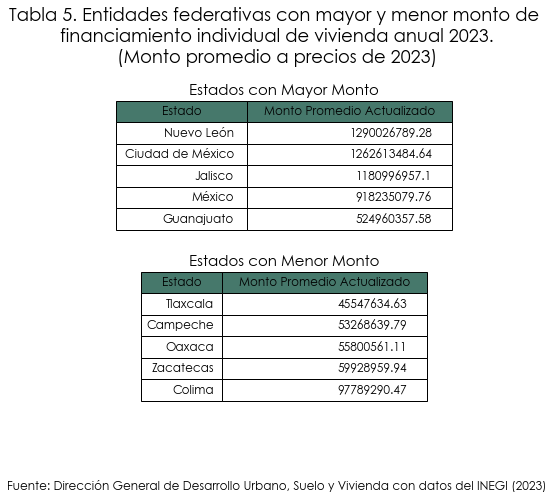

In [707]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Fuente de los textos
fuente = "Century Gothic"

# Crear la figura y los ejes con un tamaño más grande
fig, axs = plt.subplots(2, 1, figsize=(8, 5))  # Aumenta el tamaño de la figura

# Títulos de las tablas
titulo_general = "Tabla 5. Entidades federativas con mayor y menor monto de \n financiamiento individual de vivienda anual 2023. \n(Monto promedio a precios de 2023)"
titulo_tabla_monto_alto = "Estados con Mayor Monto"
titulo_tabla_monto_bajo = "Estados con Menor Monto"

# Definir color de la tabla
colors = ['#235b4eff', '#D3EEE1']  # Gris claro a blanco
cm = LinearSegmentedColormap.from_list('custom', colors, N=6)

# Tabla para los 5 estados con el monto promedio actualizado más alto
tabla_monto_alto = axs[0].table(cellText=top_5_estados_monto_alto_df.values,
                                 colLabels=top_5_estados_monto_alto_df.columns,
                                 loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_monto_alto.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_monto_alto.set_fontsize(12)  # Aumenta el tamaño de la fuente
tabla_monto_alto.auto_set_column_width(col=list(range(len(top_5_estados_monto_alto_df.columns))))
tabla_monto_alto.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[0].set_title(titulo_tabla_monto_alto, fontsize=15, fontname=fuente, pad=20)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Tabla para los 5 estados con el monto promedio actualizado más bajo
tabla_monto_bajo = axs[1].table(cellText=top_5_estados_monto_bajo_df.values,
                                 colLabels=top_5_estados_monto_bajo_df.columns,
                                 loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_monto_bajo.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_monto_bajo.set_fontsize(12)  # Aumenta el tamaño de la fuente
tabla_monto_bajo.auto_set_column_width(col=list(range(len(top_5_estados_monto_bajo_df.columns))))
tabla_monto_bajo.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[1].set_title(titulo_tabla_monto_bajo, fontsize=15, fontname=fuente, pad=20)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Ajustar el espacio entre los títulos de las tablas
plt.subplots_adjust(hspace=0.7)

# Agregar la fuente debajo de la segunda tabla
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2023)',
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12, fontname=fuente)

# Ocultar los ejes
for ax in axs:
    ax.axis('off')

# Agregar título general
plt.suptitle(titulo_general, fontsize=18, fontname=fuente, y=1.18)  # Ajusta la posición vertical del título general

# Guardar la imagen
plt.savefig('top_5_estados_monto_actualizado.png', bbox_inches='tight')

# Mostrar la imagen
plt.show()

- Figura 4. Monto promedio de financiamiento individual de vivienda anual 2023, por entidad federativa (pesos)

In [711]:
url_ind1="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/00/0/estado,tipo_credito"
r=requests.get(url_ind1)
print(r.status_code)
df_ind1=pd.DataFrame(r.json())


200


In [713]:
#Quitar los estados no distribuidos
df_ind = df_ind1[(df_ind1['estado'] != 'No distribuido')]

# Filtrar por crédito individual
credito_individual1 = df_ind1.loc[df_ind1['tipo_credito'] == 'Credito individual']

- Tabla 6. Entidades federativas con mayor y menor monto promedio de financiamiento individual de vivienda anual 2023.

In [669]:
url_ind="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/00/0/estado,tipo_credito,mes"
r=requests.get(url_ind)
print(r.status_code)
df_ind=pd.DataFrame(r.json())

df_ind.info()

200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   año           2700 non-null   int64  
 1   mes           2700 non-null   object 
 2   estado        2700 non-null   object 
 3   tipo_credito  2700 non-null   object 
 4   acciones      2700 non-null   int64  
 5   monto         2700 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 126.7+ KB


In [671]:
#Quitar los estados no distribuidos
df_ind = df_ind[(df_ind['estado'] != 'No distribuido')]

# Filtrar por crédito individual
credito_individual = df_ind.loc[df_ind['tipo_credito'] == 'Credito individual']

# Convertir el mes de tipo objeto a tipo datetime para ordenar correctamente
credindiv.index = pd.to_datetime(credindiv.index, format='%B', errors='coerce')
credindiv = credindiv.dropna()  # Eliminar las filas con fechas que no pudieron ser convertidas

# Obtener los promedios mensuales por estado 
credindiv= credito_individual.groupby(['mes', 'estado',])['monto'].mean().reset_index()
credindiv = credindiv.pivot(index='mes', columns='estado', values='monto')

# Lista de meses en orden
meses_ordenados = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# Reordenar el DataFrame según la lista de meses
credindiv = credindiv.reindex(meses_ordenados)

# DataFrame del INPC con los nombres de los meses 
inpc = pd.DataFrame({
    'mes': ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
    'Inpc': [127.336, 128.046, 128.389, 128.363, 128.084, 128.214, 128.832, 129.545, 130.12, 130.609, 131.445, 132.373]
})

# Unir los DataFrames por la columna de mes
credindiv = pd.merge(credindiv, inpc, left_on='mes', right_on='mes', how='left')

# Crear un nuevo DataFrame con los montos promedio actualizados por estado y mes
montos_actualizados = pd.DataFrame()  # Crear un DataFrame vacío para almacenar los montos actualizados

# Iterar sobre las columnas de estados en credindiv
for estado in credindiv.columns[1:-1]:
    # Calcular los montos actualizados para cada estado y mes
    montos_actualizados[estado] = round(credindiv[estado] * credindiv['Inpc'] / 100, 2)
montos_actualizados


,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacán de Ocampo,Morelos,México,Nayarit,Nuevo León,Oaxaca,Puebla,Querétaro,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
0,161370466.62,360146860.54,87328527.78,38970209.72,97349227.73,366433675.72,619236379.25,243706848.13,59410294.89,74223956.42,323558046.50,73252096.88,133421311.18,929951340.72,123150276.88,128853427.65,518066643.27,79015997.71,833334786.36,42644496.65,213560364.46,338370507.38,303994433.95,196633344.43,332755984.20,234593228.13,61656804.53,200684411.87,34835356.55,252683406.53,262530296.06,40917492.08
1,162882130.67,381287637.48,127836200.17,28249316.81,100776443.32,409536057.00,1115760365.84,345091308.57,87435454.39,115947389.22,418372032.55,89652702.66,153226745.44,1005357727.74,155647430.66,140452748.06,789948655.06,127690154.65,1144490455.86,42115932.22,263495432.98,442326849.72,380108743.11,221713685.06,350851845.31,250364129.67,81681891.86,246442936.44,38501915.01,288179160.07,235418922.97,41129231.39
2,216615427.78,467944214.26,135299064.59,46436249.85,138909041.20,511908088.59,1347634138.66,469024606.30,107190181.24,161101353.51,557024485.15,140137282.98,239325523.35,1260374939.23,205204220.86,192047547.94,873120031.89,139085627.59,1347318642.08,54326317.70,337655598.16,552622057.24,505693100.48,282008902.50,432351606.18,343247357.59,108670575.39,329411484.46,39091635.33,380826146.77,346488151.32,63276716.06
3,185013668.75,446661747.00,100922011.12,35018527.91,117289223.19,394565655.63,1094242167.50,302398676.66,68572565.37,121333528.00,372130396.69,108584176.02,204595982.45,953246980.11,159055887.44,156362942.14,715580493.88,120002434.66,1057486783.63,49093164.08,290703605.72,401579998.15,421005604.19,231666436.34,342794967.08,287684440.24,92131167.92,285909588.03,34660698.57,309000196.19,284558269.63,46865474.03
4,219498035.17,521618270.61,117926317.98,66819164.36,145044602.95,518384198.92,1323676742.36,289128831.12,96747368.94,152872402.64,491323511.16,138728709.55,268106512.23,1252473073.10,193993597.58,189344086.89,935620227.34,132628322.94,1325294479.71,56690506.05,330172234.65,419486558.01,440475601.45,242319957.84,425492359.79,360958030.17,108157501.49,318388166.22,46454752.57,372047770.28,347654409.88,59851703.40
5,259019868.82,483362075.15,177302267.94,69430255.79,168243782.50,521935768.21,1560388343.62,509570095.37,97922453.23,163400705.76,563318435.27,130929441.31,289903524.42,1154385246.25,207901162.03,194568751.01,1032505648.74,149326127.00,1467916550.20,51477061.39,371918316.19,536075189.22,532735478.10,296128479.16,457801585.64,436706344.77,123741423.74,359454733.24,47312745.80,424140981.22,339984918.34,78602458.40
6,209372476.98,442373390.36,127421852.05,51920033.26,135029192.32,473095455.31,1260597193.08,410941249.50,80468749.73,146008445.82,529663194.75,107412621.60,216020536.01,1168384302.37,198278338.69,169285309.84,844845527.86,187372039.00,1274263839.08,53370471.60,324902768.32,460502628.38,412529751.26,260229784.32,416134907.33,378419199.58,96216775.23,343820776.86,44853057.60,365951540.87,322956319.13,47520971.03
7,241188558.06,517297058.30,120414135.26,63072103.60,167899017.20,541102694.91,1354736266.49,441294116.53,113065251.12,159486300.88,545686716.17,150790959.82,299826581.62,1303653786.88,227480929.34,175022177.42,996466630.60,119830200.68,1358951124.16,50764855.34,356410882.59,454615519.52,471858845.85,301761470.61,428528529.77,406888666.75,118836384.51,398602154.74,47220661.92,405400064.85,351402476.05,60911425.28
8,234942552.90,464416419.71,140006314.32,44555237.90,154727888.95,524278093.63,1253464864.22,465922650.68,107032319.84,150507643.14,565178325.48,145066360.44,252863297.39,1129573886.87,191457966.56,170231796.86,912074845.05,140549943.13,1341585213.66,54979540.92,298927160.52,510960565.44,518808478.92,287308987.93,

In [667]:
# Crear DataFrames con nombres de columna personalizados
# Obtener los 5 estados con el monto promedio actualizado más alto
estados_monto_promedio_alto = promedio_por_estado.nlargest(5).reset_index()

# Crear DataFrame con nombres de columna personalizados y montos redondeados
top_5_estados_monto_alto_df = pd.DataFrame(estados_monto_promedio_alto)
top_5_estados_monto_alto_df.columns = ['Estado', 'Monto Promedio Actualizado']
top_5_estados_monto_alto_df['Monto Promedio Actualizado'] = top_5_estados_monto_alto_df['Monto Promedio Actualizado'].round(2)
top_5_estados_monto_alto_df

,Estado,Monto Promedio Actualizado
0,Nuevo León,1290026789.28
1,Ciudad de México,1262613484.64
2,Jalisco,1180996957.10
3,México,918235079.76
4,Guanajuato,524960357.58


In [665]:
# Obtener los 5 estados con el monto promedio actualizado más bajo
estados_monto_promedio_bajo = promedio_por_estado.nsmallest(5).reset_index()

# Crear DataFrame con nombres de columna personalizados
top_5_estados_monto_bajo_df = pd.DataFrame(estados_monto_promedio_bajo)
top_5_estados_monto_bajo_df.columns = ['Estado', 'Monto Promedio Actualizado']
top_5_estados_monto_bajo_df['Monto Promedio Actualizado'] = top_5_estados_monto_bajo_df['Monto Promedio Actualizado'].round(2)
top_5_estados_monto_bajo_df

,Estado,Monto Promedio Actualizado
0,Tlaxcala,45547634.63
1,Campeche,53268639.79
2,Oaxaca,55800561.11
3,Zacatecas,59928959.94
4,Colima,97789290.47


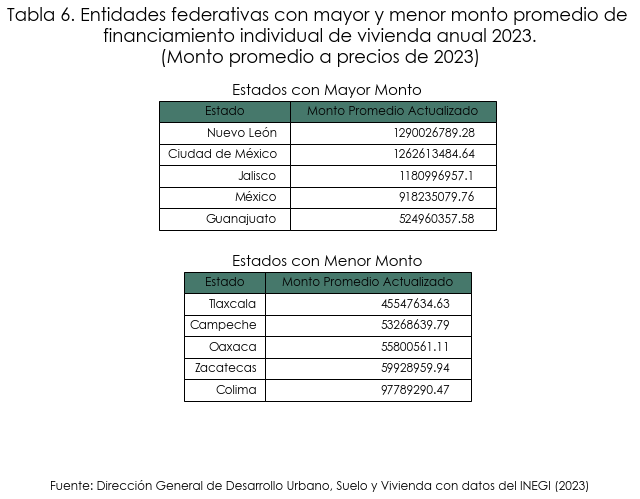

In [708]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Fuente de los textos
fuente = "Century Gothic"

# Crear la figura y los ejes con un tamaño más grande
fig, axs = plt.subplots(2, 1, figsize=(8, 5))  # Aumenta el tamaño de la figura

# Títulos de las tablas
titulo_general = "Tabla 6. Entidades federativas con mayor y menor monto promedio de \n financiamiento individual de vivienda anual 2023. \n(Monto promedio a precios de 2023)"
titulo_tabla_monto_alto = "Estados con Mayor Monto"
titulo_tabla_monto_bajo = "Estados con Menor Monto"

# Definir color de la tabla
colors = ['#235b4eff', '#D3EEE1']  # Gris claro a blanco
cm = LinearSegmentedColormap.from_list('custom', colors, N=6)

# Tabla para los 5 estados con el monto promedio actualizado más alto
tabla_monto_alto = axs[0].table(cellText=top_5_estados_monto_alto_df.values,
                                 colLabels=top_5_estados_monto_alto_df.columns,
                                 loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_monto_alto.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_monto_alto.set_fontsize(12)  # Aumenta el tamaño de la fuente
tabla_monto_alto.auto_set_column_width(col=list(range(len(top_5_estados_monto_alto_df.columns))))
tabla_monto_alto.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[0].set_title(titulo_tabla_monto_alto, fontsize=15, fontname=fuente, pad=20)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Tabla para los 5 estados con el monto promedio actualizado más bajo
tabla_monto_bajo = axs[1].table(cellText=top_5_estados_monto_bajo_df.values,
                                 colLabels=top_5_estados_monto_bajo_df.columns,
                                 loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_monto_bajo.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_monto_bajo.set_fontsize(12)  # Aumenta el tamaño de la fuente
tabla_monto_bajo.auto_set_column_width(col=list(range(len(top_5_estados_monto_bajo_df.columns))))
tabla_monto_bajo.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[1].set_title(titulo_tabla_monto_bajo, fontsize=15, fontname=fuente, pad=20)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Ajustar el espacio entre los títulos de las tablas
plt.subplots_adjust(hspace=0.7)

# Agregar la fuente debajo de la segunda tabla
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2023)',
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12, fontname=fuente)

# Ocultar los ejes
for ax in axs:
    ax.axis('off')

# Agregar título general
plt.suptitle(titulo_general, fontsize=18, fontname=fuente, y=1.18)  # Ajusta la posición vertical del título general

# Guardar la imagen
plt.savefig('top_5_estados_monto_actualizado.png', bbox_inches='tight')

# Mostrar la imagen
plt.show()

- Figura 5. Variación porcentual del monto de financiamiento de vivienda anual, por entidad federativa.

In [ ]:
# Filtrar el DataFrame para excluir 'No distribuido en Estado
df4 = df4[(df4['estado'] != 'No distribuido')]

# Crear una tabla pivote con los nombres de los estados como índice y las acciones para los años 2022 y 2023 como columnas
finmon = df4.pivot_table(index='estado', columns='año', values='monto', aggfunc='sum').reset_index()

# Renombrar las columnas para que coincidan con las especificaciones
finmon.rename(columns={2022: 'montos 2022', 2023: 'montos 2023'}, inplace=True)

# Ordenar el DataFrame por el nombre del estado
finmon.sort_values(by='estado', inplace=True)

# Reiniciar los índices
finmon.reset_index(drop=True, inplace=True)

In [ ]:
#Crear una columna con la variación porcentual 'Variación (%)
finmon['variación (%)'] = ((finmon['montos 2023'] - finmon['montos 2022']) / finmon['montos 2022']) * 100
finmon

In [ ]:
# Calculamos el valor más bajo y más alto de la variación porcentual
min = finmon['variación (%)'].min()
max = finmon['variación (%)'].max()

# Imprimimos los valores mínimo y máximo
print("Valor más bajo de la variación porcentual:", min)
print("Valor más alto de la variación porcentual:", max)

In [ ]:
# Fusionar el DataFrame finmon con el GeoDataFrame del mapa de estados
finmon_geo = estados.merge(finmon, how='inner', left_on='state_name', right_on='estado')

# Definir paleta de colores para la variación porcentual
paleta_variacion = ["#e3c8a6ff", "#c88f80ff", "#ac2540ff", "#901d3dff", "#691c32ff"]

# Definir límites de los rangos de variación porcentual
rangos = [-np.inf, -20, -10, 0, 10, 20, np.inf]

# Definir etiquetas de los rangos
etiquetas = ["< -20%", "-20% a -10%", "-10% a 0%", "0% a 10%", "10% a 20%", "> 20%"]

# Crear leyenda personalizada para la variación porcentual
leyenda_variacion = [Patch(facecolor=paleta_variacion[i], label=etiquetas[i]) for i in range(len(paleta_variacion))]

# Convertir lista de colores a un objeto de paleta de colores para la variación porcentual
cmap_variacion = ListedColormap(paleta_variacion)

# Visualizar mapa de variación porcentual de acciones de financiamiento
fig, ax = plt.subplots(figsize=(10, 10))
finmon_geo.plot(ax=ax, column='variación (%)', cmap=cmap_variacion, legend=False, linewidth=0.0, edgecolor='None')
plt.title('Figura 5. Variación porcentual del monto de financiamiento de vivienda anual, \n por entidad federativa 2022-2023.', fontdict={'fontsize': 15})
plt.text(0.5, -0.1, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', ha='center', transform=ax.transAxes, fontsize=12)
plt.axis('off')  # Quitar el marco del mapa
plt.legend(handles=leyenda_variacion, title='Variación % monto \n de financiamiento', loc='lower left', fontsize=10)  # Ubicar la leyenda en el lado izquierdo
plt.show()

- Tabla 7. Entidades federativas con mayor y menor variación porcentual en el monto total de financiamiento de vivienda anual 2023. 

In [ ]:
# Ordenar el DataFrame por la columna 'acciones'
df3_m = df3.sort_values(by='monto', ascending=False)

In [ ]:
# Obtener los 5 estados con la mayor cantidad de monto de financiamiento
estados_mas_monto = df3_m.head(5)
estados_mas_monto.info()

In [ ]:
# Obtener los 5 estados con la menor cantidad de monto de financiamiento
estados_menos_monto = df3_m.tail(5)
estados_menos_monto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Fuente de los textos
fuente = "Century Gothic"

# Crear la figura y los ejes con un tamaño más grande
fig, axs = plt.subplots(2, 1, figsize=(8, 3.5))  # Aumenta el tamaño de la figura

# Títulos de las tablas
titulo_general = "Tabla 7. Entidades federativas con mayor y menor variación porcentual \n en el monto total de financiamiento de vivienda anual 2023."
titulo_tabla_mas_monto = "Estados con Mayor Monto de Financiamiento"
titulo_tabla_menos_monto = "Estados con Menor Monto de Financiamiento"

# Definir color de la tabla
colors = ['#235b4eff', '#D3EEE1']  # Gris claro a blanco
cm = LinearSegmentedColormap.from_list('custom', colors, N=6)

# Tabla para los 5 estados con la mayor cantidad de monto de financiamiento
tabla_mas_monto = axs[0].table(cellText=estados_mas_monto[['estado', 'monto']].values,
                                  colLabels=['Estado', 'Monto'],
                                  loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_mas_monto.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_mas_monto.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_mas_monto.auto_set_column_width(col=list(range(len(estados_mas_monto.columns))))
tabla_mas_monto.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[0].set_title(titulo_tabla_mas_monto, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Tabla para los 5 estados con la menor cantidad de monto de financiamiento
tabla_menos_monto = axs[1].table(cellText=estados_menos_monto[['estado', 'monto']].values,
                                    colLabels=['Estado', 'Monto'],
                                    loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_menos_monto.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_menos_monto.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_menos_monto.auto_set_column_width(col=list(range(len(estados_menos_monto.columns))))
tabla_menos_monto.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[1].set_title(titulo_tabla_menos_monto, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Ajustar el espacio entre los títulos de las tablas
plt.subplots_adjust(hspace=1.8)

# Agregar la fuente debajo de la segunda tabla
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)',
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12, fontname=fuente)

# Ocultar los ejes
for ax in axs:
  ax.axis('off')

# Agregar título general
plt.suptitle(titulo_general, fontsize=18, fontname=fuente, y=1.28)  # Ajusta la posición vertical del título general

# Guardar la imagen
plt.savefig('top_5_estados_montos.png', bbox_inches='tight')

# Mostrar la imagen
plt.show()

## 3) PROGRAMAS SOCIALES DEL RAMO 15 CON INFORMACIÓN DISPONIBLE EN EL SNIIV	

#### Estadísticas Generales
- Tabla 8. Tabla comparativa de los subsidios otorgados por mes 2023  (en acciones)

In [ ]:
# Obtención de los datos
url_sco = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetCONAVI/2023,2023/00/0/anio,mes,programa_presupuestal"
r = requests.get(url_sco)

# Crear DataFrame a partir de los datos JSON
df_sco = pd.DataFrame(r.json())

# Mapeo de nombres de meses a números
meses_numeros = {
  'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
  'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Convertir la columna 'mes' de nombres de meses a números
df_sco['mes_numero'] = df_sco['mes'].str.lower().map(meses_numeros)

# Crear nueva columna de fecha utilizando 'anio' y 'mes_numero'
df_sco['fecha'] = pd.to_datetime({'year': df_sco['año'], 'month': df_sco['mes_numero'], 'day': 1})

# Eliminar las columnas 'anio', 'mes' y 'mes_numero'
df_sco.drop(['año', 'mes', 'mes_numero'], axis=1, inplace=True)

# Reordenar el DataFrame para que 'fecha' esté en la primera posición
df_sco = df_sco[['fecha'] + [col for col in df_sco.columns if col != 'fecha']]

# Ordenar el DataFrame por la columna de fecha
df_sco = df_sco.sort_values(by='fecha')

# Obtener datos de las fechas requeridas 2023-01 a 2023-12
df_sco = df_sco.loc[(df_sco['fecha'] >= '2023-01') & (df_sco['fecha'] <= '2023-12')]

In [ ]:
# Crear DataFrame con pivot_table para montos
df_montos = df_sco.pivot_table(index='fecha', columns='programa_presupuestal', values='monto', aggfunc='sum')
df_montos

- Tabla 9. Tabla comparativa de los subsidios otorgados por mes 2023 (en pesos)

In [ ]:
# Crear DataFrame con pivot_table para acciones
df_acciones = df_sco.pivot_table(index='fecha', columns='programa_presupuestal', values='acciones', aggfunc='sum')
df_acciones

- Gráfica 14. Total de subsidios para vivienda otorgados por el ramo 15, según programa y edad, 2023 (porcentaje)

In [ ]:
# Obtención de los datos
url_sco1 = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetCONAVI/2023,2023/00/0/anio,rango_edad,programa_presupuestal"
r = requests.get(url_sco1)

# Crear DataFrame a partir de los datos JSON
df_sco1 = pd.DataFrame(r.json())
df_sco1.info()

In [ ]:
df_sco1

- Gráfica 15. Subsidios para vivienda otorgados por el ramo 15, según programa y sexo, 2023 (porcentaje)	

In [ ]:
# Obtención de los datos
url_sco2 = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetCONAVI/2023,2023/00/0/anio,genero,programa_presupuestal"
r = requests.get(url_sco2)

# Crear DataFrame a partir de los datos JSON
df_sco2 = pd.DataFrame(r.json())
df_sco2

- Gráfica 16. Total de acciones otorgadas mediante el PRAH, mensual  2023.	

In [ ]:
# Obtención de los datos
url_PRAH = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInsus/2022,2023/00/0/anio,mes,genero"
r = requests.get(url_PRAH)

# Crear DataFrame a partir de los datos JSON
df_PRAH = pd.DataFrame(r.json())

# Mapeo de nombres de meses a números
meses_numeros = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Convertir la columna 'mes' de nombres de meses a números
df_PRAH['mes_numero'] = df_PRAH['mes'].str.lower().map(meses_numeros)

# Crear nueva columna de fecha utilizando 'anio' y 'mes_numero'
df_PRAH['fecha'] = pd.to_datetime({'year': df_PRAH['año'], 'month': df_PRAH['mes_numero'], 'day': 1})

# Eliminar las columnas 'anio', 'mes' y 'mes_numero'
df_PRAH.drop(['año', 'mes', 'mes_numero'], axis=1, inplace=True)

# Reordenar el DataFrame para que 'fecha' esté en la primera posición
df_PRAH = df_PRAH[['fecha'] + [col for col in df_PRAH.columns if col != 'fecha']]

# Ordenar el DataFrame por la columna de fecha
df_PRAH = df_PRAH.sort_values(by='fecha')

# Obtener datos de las fechas requeridas 2023-01 a 2023-12
df_PRAH = df_PRAH.loc[(df_PRAH['fecha'] >= '2023-01') & (df_PRAH['fecha'] < '2023-12')]

# Mostrar información sobre el DataFrame
df_PRAH

- Gráfica 17. Monto total de apoyos otorgados mediante el PRAH mensual 2023 (en pesos)	

## 4) OFERTA DE VIVIENDA


#### Perímetros de contención urbana y valor de la vivienda	
- Gráfica 18. Registro de vivienda según su Perímetro de Contención Urbana y el valor de la vivienda 2023 (porcentaje)

In [ ]:
# Obtención de los datos
url_ruv = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInventario/2023,6/0/0/pcu,segmento"
r = requests.get(url_ruv)

# Crear DataFrame a partir de los datos JSON
df_ruv = pd.DataFrame(r.json())
df_ruv

#### Registro de Viviendas	
- Figura 6. Registro de viviendas acumuladas según entidad federativa 2023

In [ ]:
# Obtención de los datos
url_ruv = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInventario/2023,1/0/0/pcu,segmento"
r = requests.get(url_ruv)

# Crear DataFrame a partir de los datos JSON
df_ruv = pd.DataFrame(r.json())
df_ruv



- Tabla 10. Registro de viviendas acumuladas según entidad federativa 2023


#### Inventario de Vivienda
- Tabla 11. Inventario de vivienda acumulado mensual 2023 según entidad federativa


In [ ]:
# Obtención de los datos
url_ruv = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInventario/2023,1/00/0/estado,pcu"
r = requests.get(url_ruv)

# Crear DataFrame a partir de los datos JSON
df_ruv = pd.DataFrame(r.json())
df_ruv

# grafica de barras

- Figura 7. Inventario de vivienda acumulado según entidad federativa, mensual 2023.

In [ ]:
# Obtención de los datos
url_ruv = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInventario/2023,1/0/0/pcu"
r = requests.get(url_ruv)

# Crear DataFrame a partir de los datos JSON
df_ruv = pd.DataFrame(r.json())
df_ruv

# grafica de barras

- Tabla 12. Inventario por situación de avance (Miles de viviendas)

In [ ]:
# Obtención de los datos
url_ruv = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInventario/2023,1/0/0/pcu,segmento"
r = requests.get(url_ruv)

# Crear DataFrame a partir de los datos JSON
df_ruv = pd.DataFrame(r.json())
df_ruv

# grafica de barras

## 5) ÍNDICE DE PRECIOS SOCIEDAD HIPOTECARIA FEDERAL 